In [1]:
#import matplotlib
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_train.csv", encoding = "ISO-8859-1", error_bad_lines=False)


In [2]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
#remove rows that are null
df = df[np.isfinite(df['pclass'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerId    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
#Create missing value report
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
passengerId      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Missing values per row:
0    1
1    0
2    1
3    0
4    1
dtype: int64


In [5]:
#Explore values of pclass 
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

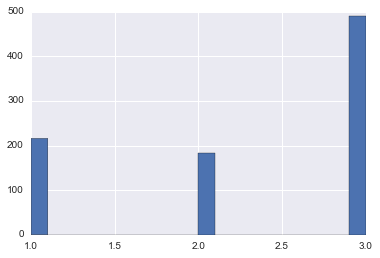

In [6]:
#pclass histogram
%matplotlib inline
df['pclass'].hist(bins=20)


In [7]:
#Explore values of survived 
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

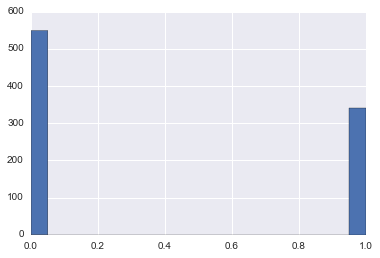

In [8]:
#survived histogram
%matplotlib inline
df['survived'].hist(bins=20)

In [9]:
#Explore values of sex 
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [10]:
#Explore values of age 
df['age'].value_counts()
#df[['age']].sort_values(by=["age"], ascending=[True])

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
27.00    18
35.00    18
26.00    18
32.00    18
31.00    17
16.00    17
23.00    15
20.00    15
34.00    15
33.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
48.00     9
         ..
0.75      2
45.50     2
64.00     2
30.50     2
0.83      2
32.50     2
40.50     2
71.00     2
28.50     2
63.00     2
59.00     2
57.00     2
55.00     2
70.00     2
55.50     1
24.50     1
34.50     1
0.92      1
36.50     1
0.42      1
23.50     1
12.00     1
20.50     1
14.50     1
80.00     1
74.00     1
70.50     1
66.00     1
53.00     1
0.67      1
Name: age, dtype: int64

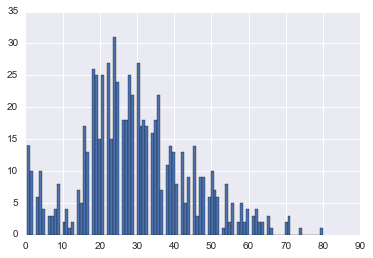

In [11]:
df['age'].hist(bins=100)

# Impute NULL age

In [12]:
#age mean
df.age.mean()

29.69911764705882

In [13]:
#age median
df.age.median()

28.0

In [14]:
df.age.mode()

0    24.0
dtype: float64

In [15]:
#Filer ages of male
df_male = df.loc[(df["sex"]=="male")]


In [16]:
#Check age distribution for male
df_male.age.value_counts()

28.00    18
25.00    18
19.00    18
21.00    17
36.00    15
32.00    15
22.00    15
30.00    14
24.00    14
29.00    13
18.00    13
20.00    13
26.00    13
27.00    12
34.00    11
16.00    11
35.00    10
31.00    10
23.00    10
42.00    10
33.00     9
39.00     8
47.00     7
17.00     7
40.00     7
38.00     6
45.00     6
51.00     6
44.00     6
37.00     5
         ..
40.50     2
8.00      2
71.00     2
0.83      2
64.00     2
59.00     2
58.00     2
45.50     2
70.00     2
6.00      1
32.50     1
10.00     1
34.50     1
12.00     1
55.00     1
15.00     1
20.50     1
30.50     1
0.92      1
24.50     1
23.50     1
0.42      1
80.00     1
74.00     1
70.50     1
66.00     1
36.50     1
57.00     1
55.50     1
0.67      1
Name: age, dtype: int64

In [17]:
#Check age distribution of survived male
df_male_survived = df_male.loc[(df["survived"]==1)]


In [18]:
#Caluclate the median of survived male age
avg_age_sur_male = df_male_survived.age.median()
avg_age_sur_male

28.0

In [19]:
#Calculate the median of dead male
df_male_dead = df_male.loc[(df["survived"]==0)]
avg_age_dead_male = df_male_dead.age.median()
avg_age_dead_male

29.0

In [20]:
#Filer ages of female
df_female = df.loc[(df["sex"]=="female")]


In [21]:
#Check age distribution for female
df_female.age.value_counts()

24.00    16
18.00    13
22.00    12
30.00    11
35.00     8
21.00     7
28.00     7
36.00     7
29.00     7
31.00     7
19.00     7
33.00     6
16.00     6
45.00     6
17.00     6
27.00     6
2.00      6
40.00     6
39.00     6
23.00     5
50.00     5
26.00     5
25.00     5
38.00     5
4.00      5
9.00      4
34.00     4
5.00      4
41.00     4
15.00     4
         ..
44.00     3
54.00     3
58.00     3
42.00     3
20.00     2
13.00     2
8.00      2
6.00      2
3.00      2
1.00      2
0.75      2
43.00     2
47.00     2
49.00     2
52.00     2
63.00     2
30.50     1
56.00     1
14.50     1
62.00     1
60.00     1
57.00     1
53.00     1
7.00      1
55.00     1
37.00     1
10.00     1
11.00     1
51.00     1
32.50     1
Name: age, dtype: int64

In [22]:
#Calculate the median of survived female
df_female_survived = df_female.loc[(df["survived"]==1)]
avg_age_sur_female = df_female_survived.age.median()
avg_age_sur_female

28.0

In [23]:
#Calculate the median of dead female
df_female_dead = df_female.loc[(df["survived"]==0)]
avg_age_dead_female = df_female_dead.age.median()
avg_age_dead_female

24.5

In [24]:
# Summarizing the median of ages as calculated--
#Survived Male median age : 27
#Dead Male median age : 29
#Survived Female median age : 28.5
#Dead Female median age : 24.5


In [25]:
#Analyze the ratio of ages that are null in the buckets -
#Male / Survived
#Male / Dead
#Female / Survived
#Female / Dead

In [26]:
#Apply boolean indexing to filter the null ages in an interim dataframe-
df_with_null_ages = df.loc[(df["age"].isnull())]

In [27]:
#Function to calculate null age for male (Survived and Dead) and female (Survived and Dead)

def fillNullAge(row):
#    x=float('nan')
    if math.isnan(row.age):
#    if row.age.isnull():
        if ((row.sex in ['male']) and (row.survived in [1])):
            output = avg_age_sur_male
        elif ((row.sex in ['male']) and (row.survived in [0])):
            output = avg_age_dead_male
        elif ((row.sex in ['female']) and (row.survived in [1])):
            output = avg_age_sur_female
        else:
            output = avg_age_dead_female
    else:
        output = row.age

    return output


In [28]:
#Impute Null age
df.age = df.apply(lambda row: fillNullAge(row), axis=1)


In [29]:
#Convert sex to Child for age less than equal 10.
def getChild(row):
    
        if (row.age <= 10) :
            output = 'Child'         
        else:
            output = row.sex
    
        return output
        

In [30]:
#Impute sex for treating all passengers with less or equl to 10 years of age as child
df['sex'] = df.apply(lambda row: getChild(row), axis=1)


# Density Plots

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


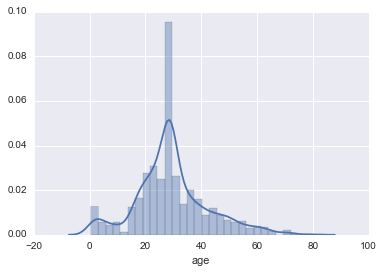

In [31]:
sns.distplot(df.age)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


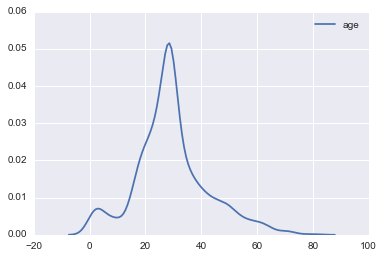

In [32]:
#kernel density estimation (KDE) 
sns.kdeplot(df.age)

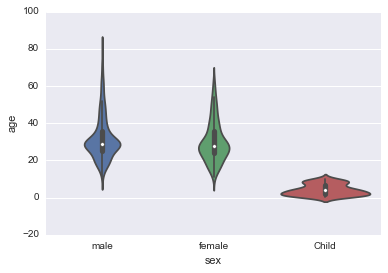

In [33]:
#Explore age by gender; draw a violin plot
import matplotlib.pyplot as plt
import seaborn as sns 
sns.violinplot(df['sex'], df['age']) #Variable Plot
sns.despine()

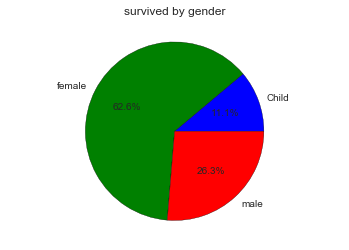

In [34]:
#Pie chart of number of survived by gender
var=df.groupby(['sex']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by gender")
plt.show()

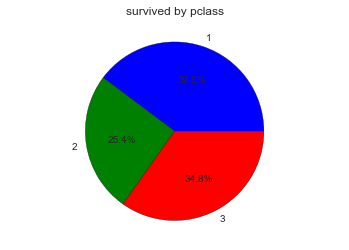

In [35]:
#Pie chart of number of survived by pclass
var=df.groupby(['pclass']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by pclass")
plt.show()

In [36]:
#Function to seperate last name from name column
def findLastName(x):
    name_str = str(x)
    output = []
    output = name_str.split(",")

    return output[0]




In [37]:
#Create Last Name column
df['lastname'] = df.name.apply(findLastName)


In [38]:
#Create a age range column
#first check the age max and min
df1 = df[['age']]
df1.describe()

,age
count,891.000000
mean,29.416016
std,13.027527
min,0.420000
25%,22.000000
50%,29.000000
75%,35.000000
max,80.000000


In [39]:
#create function to derive the age range :
def findAgeRange(x):
    if (x < 1):
        output = "1-"
    elif (x >= 1 and x <10):
        output = "1+"
    elif (x >= 10 and x <20):
        output = "10+"
    elif (x >= 20 and x <30):
        output = "20+"
    elif (x >= 30 and x <40):
        output = "30+"
    elif (x >= 40 and x <50):
        output = "40+"
    elif (x >= 50 and x <60):
        output = "50+"
    elif (x >= 60 and x <70):
        output = "60+"
    else:
        output = "70+"
    return output

In [40]:
#Create ageTange column
df['ageRange'] = df.age.apply(findAgeRange)


In [41]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [42]:
#There are two nulls in "embarked" column. Impute them with "S" given the high frequency of "S".
df['embarked'].fillna("S", inplace=True)


In [43]:
#Expand Embarked name
#Create function getEmbarkedLocation

def getEmbarkedLocation(x):
    if (x in ('C')):
        output = "Cherbourg"
    elif (x in ('Q')):
        output = "Queenstown"
    elif (x in ('S')):
        output = "Southampton"
    else:
        output = "Unknown"
    
    return output
    
    

In [44]:
#Explore Cabin to get the 1st character, like if the Cabin 'B65' we want to get 'B'.
#Write function
def getCabinID(x):
    cabin = str(x)
    if cabin == "":
        output = 'U'
    else:
        output = cabin[:1]
        
    return output

In [45]:
#Create CabinID
df['CabinID'] = df.cabin.apply(getCabinID)


In [46]:
df1 = df[['pclass', 'sex', 'survived']]

df1.groupby( [ "pclass", "sex"] )['survived'].sum()

pclass  sex   
1       Child      2
        female    91
        male      43
2       Child     17
        female    62
        male       8
3       Child     19
        female    61
        male      39
Name: survived, dtype: int64

In [47]:
#Convert the preceeding groupby in to a dataframe and draw a distplot

df_group = pd.DataFrame({'count' : df1.groupby( [ "pclass", "sex"] )['survived'].sum()}).reset_index()
df_group.columns = ['pclass', 'sex', 'survived']
df_group

,pclass,sex,survived
0,1,Child,2
1,1,female,91
2,1,male,43
3,2,Child,17
4,2,female,62
5,2,male,8
6,3,Child,19
7,3,female,61
8,3,male,39


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


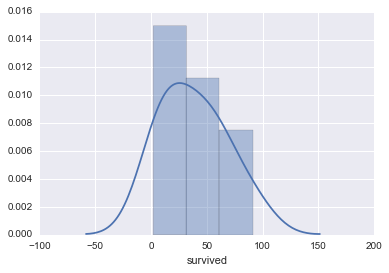

In [48]:
sns.distplot(df_group.survived)

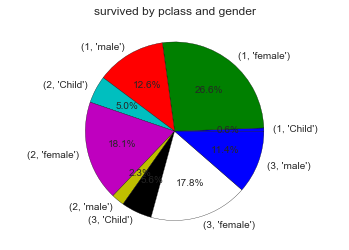

In [49]:
#Draw a pie
#Pie chart of number of survived by pclass and gender
var=df.groupby(['pclass', 'sex']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by pclass and gender")
plt.show()

In [50]:
#Create nhew column "embarkedPort"
df['embarkedPort'] = df.embarked.apply(getEmbarkedLocation)


In [58]:
#Extrack last name
def getLastName(x):
    name_arr =[]
    name_arr = x.split(",")
    output = name_arr[0]
    return output

In [59]:
df['lastname'] = df.name.apply(getLastName)

In [60]:
#Check survival chance with Name
#Create pivot

temp2 = df.pivot_table(values='survived',index=['lastname'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by name:') 
print (temp2)


Probility of survival by name:
lastname
Abbing              0.000000
Abbott              0.500000
Abelson             0.500000
Adahl               0.000000
Adams               0.000000
Ahlin               0.000000
Aks                 1.000000
Albimona            1.000000
Alexander           0.000000
Alhomaki            0.000000
Ali                 0.000000
Allen               0.500000
Allison             0.333333
Allum               0.000000
Andersen-Jensen     1.000000
Anderson            1.000000
Andersson           0.222222
Andreasson          0.000000
Andrew              0.000000
Andrews             0.500000
Angle               1.000000
Appleton            1.000000
Arnold-Franchi      0.000000
Artagaveytia        0.000000
Asim                0.000000
Asplund             0.750000
Astor               1.000000
Attalah             0.000000
Aubart              1.000000
Augustsson          0.000000
                      ...   
Wells               1.000000
West                0.666667
Wh

In [51]:
#Create new dataframe
df1=df[['pclass', 'survived', 'lastname', 'sex', 'age', 'ageRange', 'sibsp', 'parch', 'fare', 'ticket',
#        'CabinID', 'embarkedPort', 'boat', 'body', 'dest']]
        'CabinID', 'embarkedPort']]


In [409]:
#Check if there is Null in transformed fare
#Applying on fare column:
print ("Missing values in fare:")
print (df[['fare']].apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values in fare:
fare    0
dtype: int64


In [410]:
#Create dataframe for fare
df_fare = df1[['fare']]
df_fare.describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


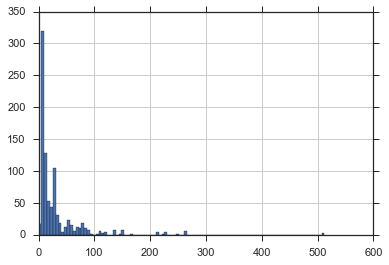

In [411]:
#Histogram for fare
df1['fare'].hist(bins=100)

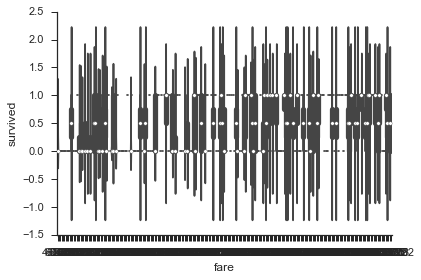

In [412]:
#Explore survived by fare; draw a violin plot
import matplotlib.pyplot as plt
import seaborn as sns 
sns.violinplot(df1['fare'], df1['survived']) #Variable Plot
sns.despine()

In [413]:
#Find fare mode
df1[['fare']].mode()

,fare
0,8.05


In [414]:
#Find fare median
df1[['fare']].median()

fare    14.4542
dtype: float64

In [415]:
#Create a function to derive fare class
def getfareClass(x):
    if (x >= 0 and x <5):
        output = "low"
    elif (x >= 5 and x <10):
        output = "lower"
    elif (x >= 10 and x <20):
        output = "lower medium"
    elif (x >= 20 and x <30):
        output = "medium"
    elif (x >= 30 and x <40):
        output = "upper medium"
    elif (x >= 40 and x <50):
        output = "high"
    elif (x >= 50 and x <100):
        output = "very high"
    elif (x >= 100):
        output = "super high"
    else:
        output = "Undefined"
    return output

In [416]:
#Create a function to derive fare class
def findfareClass(x):
    if (x >= 0 and x <10):
        output = "low"
    elif (x >= 10 and x <30):
        output = "regular"
    elif (x >= 30 and x <50):
        output = "mid high"
    elif (x >= 50 and x <100):
        output = "high"
    elif (x >= 100):
        output = "very high"
    else:
        output = "Undefined"
    return output

In [657]:
df1['FareClass'] = df1.fare.apply(findfareClass)
df1.FareClass.value_counts()/891

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


low          0.377104
regular      0.353535
high         0.121212
mid high     0.088664
very high    0.059484
Name: FareClass, dtype: float64

In [418]:
#There are lot of outliers in fare. Perform log transformation to standardize the fare data.
#df['fare'] = np.log(df['fare'])
#%matplotlib inline
#df['fare'].hist(bins=500)

In [419]:
#df[['fare']].describe()

In [420]:
#Check if there is Null in transformed fare
#Applying on fare column:
#print ("Missing values in fare:")
#print (df[['fare']].apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

In [421]:
#Find fare mode
#df[['fare']].mode()

In [422]:
#Find fare median
#df[['fare']].median()

In [423]:
#Fill in null values of fare using the median value
#df['fare'].fillna(df['fare'].mean(), inplace=True)

In [424]:
#Re-check null for fare
#print ("Missing values in fare:")
#print (df[['fare']].apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

In [425]:
#Check survival chance with gender and age
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['sex', 'ageRange'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by gender and age:') 
print (temp2)


Probility of survival by gender and age:
sex     ageRange
Child   1+          0.563636
        1-          1.000000
        10+         0.000000
female  10+         0.772727
        20+         0.704000
        30+         0.833333
        40+         0.687500
        50+         0.888889
        60+         1.000000
male    10+         0.125000
        20+         0.150735
        30+         0.214953
        40+         0.210526
        50+         0.133333
        60+         0.133333
        70+         0.142857
Name: survived, dtype: float64


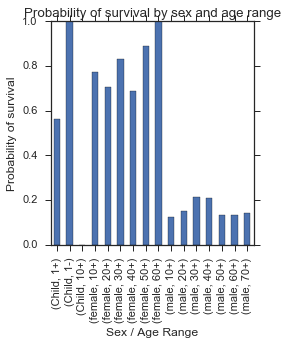

In [426]:
#Bar graph of survival probability by sex and age range

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Sex / Age Range')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by sex and age range")

In [427]:
#Create a pivot by pclass, gender and ageRange and survival chance and draw a bar graph
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['pclass', 'sex', 'ageRange'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by class, gender and age:') 
print (temp2)


Probility of survival by class, gender and age:
pclass  sex     ageRange
1       Child   1+          0.500000
                1-          1.000000
        female  10+         1.000000
                20+         0.960000
                30+         1.000000
                40+         1.000000
                50+         0.916667
                60+         1.000000
        male    10+         0.400000
                20+         0.358974
                30+         0.521739
                40+         0.375000
                50+         0.266667
                60+         0.100000
                70+         0.250000
2       Child   1+          1.000000
                1-          1.000000
        female  10+         1.000000
                20+         0.888889
                30+         0.941176
                40+         0.900000
                50+         0.833333
        male    10+         0.100000
                20+         0.054054
                30+         0.096774
 

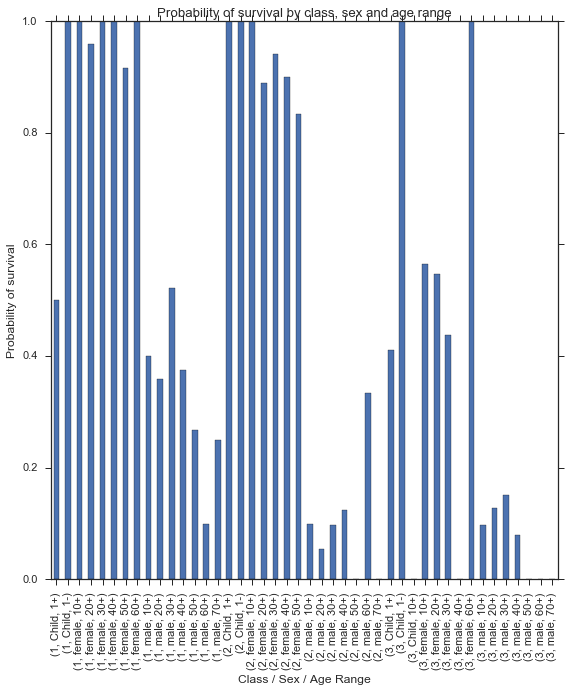

In [428]:
#Bar graph of survival probability by sex and age range

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Class / Sex / Age Range')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by class, sex and age range")

In [429]:
#Create a Dataframe with the above pivot conntaining pclass, sex, ageRange and Survval chance

df_pivot = pd.DataFrame({'count' : df1.pivot_table(values='survived',
    index=['pclass', 'sex', 'ageRange'],aggfunc=lambda x: x.mean()*100)}).reset_index()

df_pivot.columns = ['pclass', 'sex', 'ageRange', 'Survival']
df_pivot

,pclass,sex,ageRange,Survival
0,1,Child,1+,50.000000
1,1,Child,1-,100.000000
2,1,female,10+,100.000000
3,1,female,20+,96.000000
4,1,female,30+,100.000000
5,1,female,40+,100.000000
6,1,female,50+,91.666667
7,1,female,60+,100.000000
8,1,male,10+,40.000000
9,1,male,20+,35.897436


In [430]:
#Check survival chance with gender 
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['sex'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by gender :') 
print (temp2)


Probility of survival by gender :
sex
Child     0.593750
female    0.756184
male      0.165441
Name: survived, dtype: float64


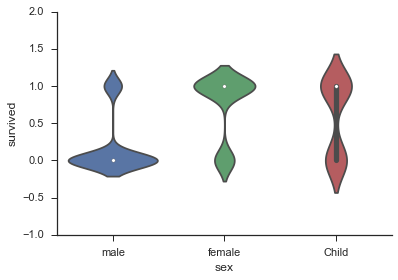

In [431]:
#Violin plot to represent survival by sex

sns.violinplot(df1['sex'], df1['survived']) #Variable Plot
sns.despine()

In [432]:
#Check survival chance with age
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['ageRange'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by age:') 
print (temp2)


Probility of survival by age:
ageRange
1+     0.563636
1-     1.000000
10+    0.401961
20+    0.324937
30+    0.437126
40+    0.382022
50+    0.416667
60+    0.315789
70+    0.142857
Name: survived, dtype: float64


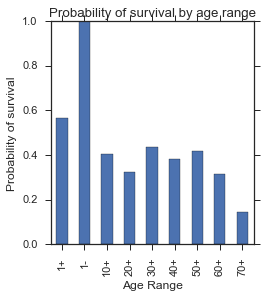

In [433]:
#Bar graph of survival probability by age range
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Age Range')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by age range")

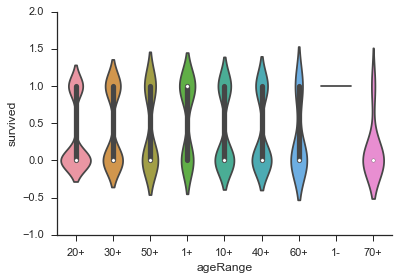

In [434]:
#Violin plot to represent survival by age
import matplotlib.pyplot as plt
import seaborn as sns 
sns.violinplot(df1['ageRange'], df1['survived']) #Variable Plot
sns.despine()

In [435]:
#Check survival chance with fareClass
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['FareClass'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Fare Class:') 
print (temp2)


Probility of survival by Fare Class:
FareClass
high         0.648148
low          0.199405
mid high     0.405063
regular      0.425397
very high    0.735849
Name: survived, dtype: float64


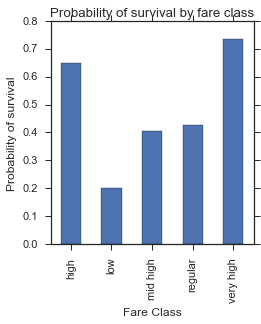

In [436]:
#Bar graph of survival probability by Fare Class
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Fare Class')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by fare class")

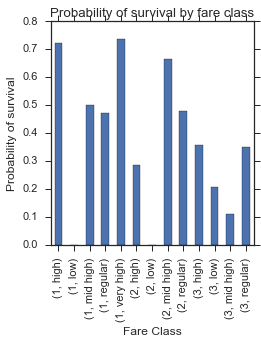

In [437]:
#Survival probability by pclass and fareclass
#Create pivot
temp2 = df1.pivot_table(values='survived',index=[ 'pclass', 'FareClass'],aggfunc=lambda x: x.mean())

#Bar graph of survival probability by Pclass and Fare Class
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Fare Class')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by fare class")

In [449]:
#Survived Group by Pclass and Fareclass
df1.groupby( [ "pclass", "FareClass"] )['survived'].sum()

pclass  FareClass
1       high         63
        low           0
        mid high     17
        regular      17
        very high    39
2       high          2
        low           0
        mid high     12
        regular      73
3       high          5
        low          67
        mid high      3
        regular      44
Name: survived, dtype: int64

In [450]:
#Do a Count group by pclass and fareclass
#Survived Group by Pclass and Fareclass
df1.groupby( [ "pclass", "FareClass"] )['survived'].count()

pclass  FareClass
1       high          87
        low            6
        mid high      34
        regular       36
        very high     53
2       high           7
        low            6
        mid high      18
        regular      153
3       high          14
        low          324
        mid high      27
        regular      126
Name: survived, dtype: int64

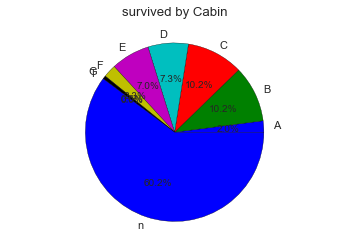

In [451]:
#Check Survival chance by CabinID
#Group Survical by CabinID
#Draw a Pie
#Pie chart of number of survived by gender
var=df.groupby(['CabinID']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by Cabin")
plt.show()

In [452]:
#Draw a Bar through Pivot
temp2 = df1.pivot_table(values='survived',index=['CabinID'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Cabin:') 
print (temp2)


Probility of survival by Cabin:
CabinID
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: survived, dtype: float64


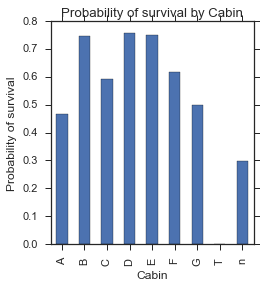

In [453]:
#Bar graph of survival probability by Cabin
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Cabin')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Cabin")

In [454]:
#Measure Survival chance by pclass and Cabin
#Draw a Bar through Pivot for Survival chance vs. pclass and Cabin
temp2 = df1.pivot_table(values='survived',index=['pclass', 'CabinID'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Class and Cabin:') 
print (temp2)


Probility of survival by Class and Cabin:
pclass  CabinID
1       A          0.466667
        B          0.744681
        C          0.593220
        D          0.758621
        E          0.720000
        T          0.000000
        n          0.475000
2       D          0.750000
        E          0.750000
        F          0.875000
        n          0.440476
3       E          1.000000
        F          0.200000
        G          0.500000
        n          0.235908
Name: survived, dtype: float64


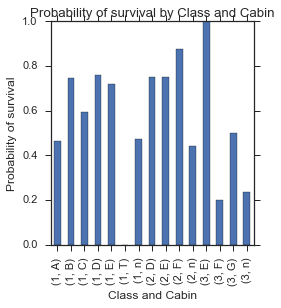

In [455]:
#Bar graph of survival probability by Class and Cabin
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Class and Cabin')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Class and Cabin")

In [456]:
#Measure by embarked Port
#Measure Survival chance by EmbarkedPort
#Draw a Bar through Pivot for Survival chance vs. embarked port
temp2 = df1.pivot_table(values='survived',index=['embarkedPort'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Embarked Port:') 
print (temp2)


Probility of survival by Embarked Port:
embarkedPort
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
Name: survived, dtype: float64


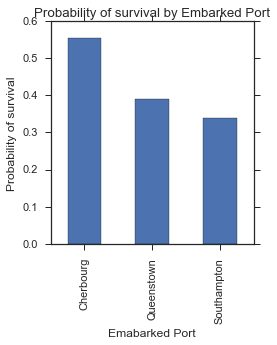

In [457]:
#Bar graph of survival probability by Embarked Port
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Emabarked Port')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Embarked Port")

In [458]:
#Check with parch in combo with cabin and lastname, gender. Do a pivot
temp2 = df1.pivot_table(values='survived',index=['CabinID', 'ticket', 'lastname', 'sex', 'parch', 'sibsp'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Cabib, lastname, gender, parch, sibsp:') 
print (temp2)


Probility of survival by Cabib, lastname, gender, parch, sibsp:
CabinID  ticket             lastname         sex     parch  sibsp
A        110465             Clifford         male    0      0        0.0
         112050             Andrews          male    0      0        0.0
         112277             Blank            male    0      0        1.0
         113056             Smith            male    0      0        0.0
         113767             Rood             male    0      0        0.0
         113788             Sloper           male    0      0        1.0
         11755              Duff Gordon      female  0      1        1.0
         13049              Ross             male    0      0        0.0
         13213              Simonius-Blumer  male    0      0        1.0
         17764              Smith            male    0      0        0.0
         27042              Barkworth        male    0      0        1.0
         33638              Dodge            Child   2      0     

In [459]:
#Create a dataframe with the above data

df_relatives = pd.DataFrame({'count' : df1.pivot_table(values='survived',
        index=['CabinID', 'ticket', 'lastname', 'sex', 'parch', 'sibsp'],
        aggfunc=lambda x: x.mean())}).reset_index()
df_relatives.columns=['CabinID', 'Ticket', 'LastName', 'Gender', 'ParentChild', 'SpouseSibling','survived']
df_relatives.sort_values(['CabinID', 'Ticket'], ascending=[True, False], inplace=True)
df_relatives

,CabinID,Ticket,LastName,Gender,ParentChild,SpouseSibling,survived
14,A,PC 17754,Goldschmidt,male,0,0,0.0
13,A,PC 17590,Roebling,male,0,0,0.0
12,A,PC 17485,Duff Gordon,male,0,1,1.0
11,A,33638,Dodge,Child,2,0,1.0
10,A,27042,Barkworth,male,0,0,1.0
9,A,17764,Smith,male,0,0,0.0
8,A,13213,Simonius-Blumer,male,0,0,1.0
7,A,13049,Ross,male,0,0,0.0
6,A,11755,Duff Gordon,female,0,1,1.0
5,A,113788,Sloper,male,0,0,1.0


In [460]:
#Create column for relationsip ; this can have values - 'Parent/Child', 'Spouse/Sibling', 'Both'
#, 'None'
#Create function to derive these values
def findRels(row):
    if (row.ParentChild > 0 and row.SpouseSibling == 0):
            output = 'Parent/Child'
    elif (row.ParentChild > 0 and row.SpouseSibling > 0):
            output = 'Both'
    elif (row.ParentChild == 0 and row.SpouseSibling > 0):
            output = 'Spouse/Sibling'
    else:
            output = 'None'

    return output




In [461]:
#Create the Relations column
df_relatives['relations'] = df_relatives.apply(lambda row: findRels(row), axis=1)
df_relatives

,CabinID,Ticket,LastName,Gender,ParentChild,SpouseSibling,survived,relations
14,A,PC 17754,Goldschmidt,male,0,0,0.0,None
13,A,PC 17590,Roebling,male,0,0,0.0,None
12,A,PC 17485,Duff Gordon,male,0,1,1.0,Spouse/Sibling
11,A,33638,Dodge,Child,2,0,1.0,Parent/Child
10,A,27042,Barkworth,male,0,0,1.0,None
9,A,17764,Smith,male,0,0,0.0,None
8,A,13213,Simonius-Blumer,male,0,0,1.0,None
7,A,13049,Ross,male,0,0,0.0,None
6,A,11755,Duff Gordon,female,0,1,1.0,Spouse/Sibling
5,A,113788,Sloper,male,0,0,1.0,None


In [462]:
#Pivot Relations and Survival
temp2 = df_relatives.pivot_table(values='survived',index=['relations'],aggfunc=lambda x: x.mean()*100)

print ('\nProbility of survival by relations:') 
print (temp2)


Probility of survival by relations:
relations
Both              45.792880
None              30.373832
Parent/Child      66.666667
Spouse/Sibling    50.000000
Name: survived, dtype: float64


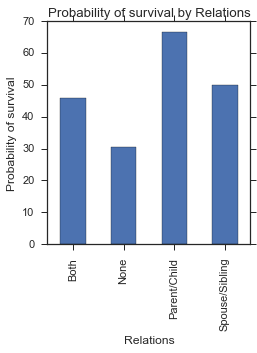

In [463]:
#Draw the bar graph for survived based on relations
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Relations')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Relations")

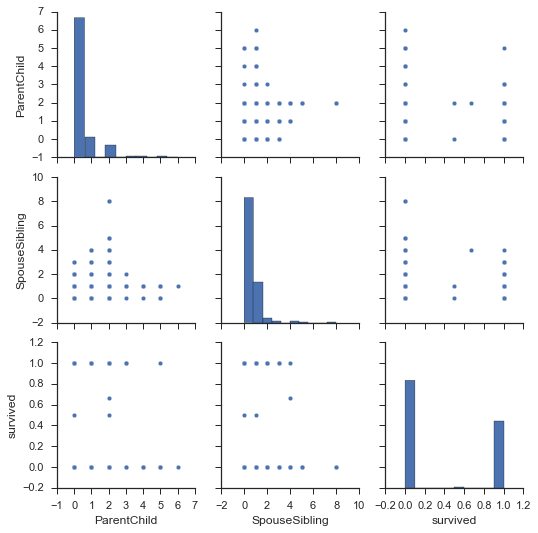

In [464]:
sns.pairplot(df_relatives);

In [465]:
#Check if there is any corelaton between boat, body and survived. If too many nulls then drop these features
#df_bb = df1[['boat', 'body', 'survived']]


# In order of significance the features are -
#Gender, Age, Class, Cabin, embarkedPort, Relations

In [466]:
#Create column for relationsip ; this can have values - 'Parent/Child', 'Spouse/Sibling', 'Both'
#, 'None'
#Create function to derive these values
def findRelations(row):
    if (row.parch > 0 and row.sibsp == 0):
            output = 'Parent/Child'
    elif (row.parch > 0 and row.sibsp > 0):
            output = 'Both'
    elif (row.parch == 0 and row.sibsp > 0):
            output = 'Spouse/Sibling'
    else:
            output = 'None'

    return output



In [469]:
#Create final dataframe
df1['relations'] = df1.apply(lambda row: findRelations(row), axis=1)
df2 = df1[['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations', 'FareClass', 'survived']]
df3 = df2[['pclass', 'sex', 'age', 'embarkedPort', 'relations', 'FareClass']]
df3

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,pclass,sex,age,embarkedPort,relations,FareClass
0,3,male,22.0,Southampton,Spouse/Sibling,low
1,1,female,38.0,Cherbourg,Spouse/Sibling,high
2,3,female,26.0,Southampton,None,low
3,1,female,35.0,Southampton,Spouse/Sibling,high
4,3,male,35.0,Southampton,None,low
5,3,male,29.0,Queenstown,None,low
6,1,male,54.0,Southampton,None,high
7,3,Child,2.0,Southampton,Both,regular
8,3,female,27.0,Southampton,Parent/Child,regular
9,2,female,14.0,Cherbourg,Spouse/Sibling,mid high


In [471]:
#Final check - draw a pivot and bar graph
temp2 = df1.pivot_table(values='survived',
    index=['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations', 'FareClass'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival :') 
print (temp2)


Probility of survival :
pclass  sex     age    CabinID  embarkedPort  relations       FareClass
1       Child   0.92   C        Southampton   Both            very high    1.000000
                2.00   C        Southampton   Both            very high    0.000000
                4.00   A        Southampton   Parent/Child    high         1.000000
        female  14.00  B        Southampton   Both            very high    1.000000
                15.00  B        Southampton   Parent/Child    very high    1.000000
                16.00  B        Cherbourg     Parent/Child    high         1.000000
                                Southampton   None            high         1.000000
                       D        Southampton   Parent/Child    mid high     1.000000
                17.00  B        Southampton   Spouse/Sibling  high         1.000000
                       C        Cherbourg     Spouse/Sibling  very high    1.000000
                18.00  B        Cherbourg     Both            v

# Apply machine learning algos

In [473]:
#Convert all data types to numeric for SCikit

from sklearn.preprocessing import LabelEncoder
var_mod = ['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations', 'FareClass', 'survived']
le = LabelEncoder()
for i in var_mod:
    if df2[i].dtypes=='object':
        df2[i] = le.fit_transform(df2[i])
df2.dtypes


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


pclass            int64
sex               int64
age             float64
CabinID           int64
embarkedPort      int64
relations         int64
FareClass         int64
survived          int64
dtype: object

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


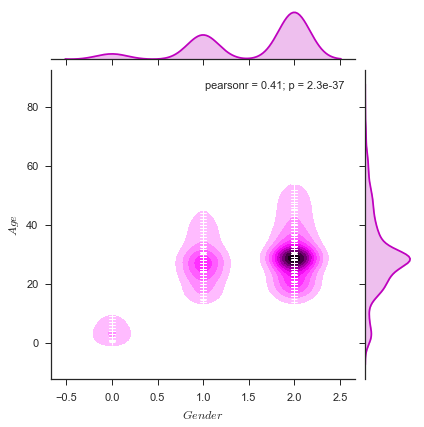

In [474]:
#KDE Jointplot/ Jointgrid for sex and age
g = sns.jointplot(x="sex", y="age", data=df2, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Gender$", "$Age$");

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


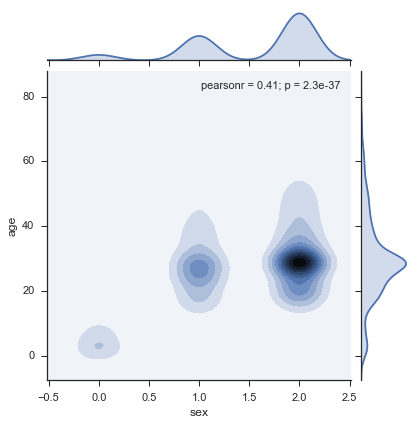

In [475]:
sns.jointplot(x="sex", y="age", data=df2, kind="kde");

In [476]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import linear_model

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [477]:
#define a function which will help us create different models and perform cross-validation.

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
  
    dtrain['survived'] = label_binarize(dtrain['survived'], classes=[0, 1])
    alg.fit(dtrain[predictors], dtrain['survived'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['survived'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# Logistic Regression

In [478]:
#Generate Logistic Regession model
outcome_var = 'survived' 
model = LogisticRegression() 
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'FareClass'] 
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 78.563%
Cross-Validation Score : 77.116%


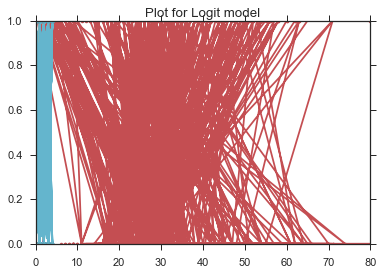

In [479]:
#Plot the physical model for above Logit algo

y_pred = model.predict(df2[predictor_var])
plt.plot(df2[predictor_var],y_pred)
plt.plot(df2[predictor_var],df2[outcome_var],'.')
plt.title('Plot for Logit model')



In [480]:
outcome_var = 'survived'
model = LogisticRegression()
predictor_var = ['pclass', 'sex', 'age']
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 79.125%
Cross-Validation Score : 78.458%


In [481]:
outcome_var = 'survived'
model = LogisticRegression()
predictor_var = ['sex', 'age']
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 79.461%
Cross-Validation Score : 79.124%


# KNN algo

In [482]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
knn0=KNeighborsClassifier(n_neighbors=5)
modelfit(knn0, df2, predictors)


Model Report
Accuracy : 0.8474
AUC Score (Train): 0.908462
CV Score : Mean - 0.7978543 | Std - 0.04295365 | Min - 0.728877 | Max - 0.8518717


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

# SVM MODEL

In [483]:
#Generate SVM model
from sklearn import svm
#Create SVM classification object
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001, verbose=False) 
predictor_var = ['pclass', 'sex', 'age', 'embarkedPort', 'relations', 'FareClass'] 
outcome_var = 'survived' 
classification_model(model, df2, predictor_var, outcome_var)


Accuracy : 88.777%
Cross-Validation Score : 78.237%


In [484]:
#Tune SVM model using grid search
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
svc0 = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001, verbose=False)
modelfit(svc0, df2, predictors)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8878
AUC Score (Train): 0.939782
CV Score : Mean - 0.8640534 | Std - 0.0459595 | Min - 0.8012987 | Max - 0.9377005


AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [488]:
#Use GridsearchCV to tune SVM
#Choose all predictors except gamma
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'gamma':[0,10,20,30,40,50,60,70]}

gsearch1 = GridSearchCV(estimator = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, 
                          degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=10, 
                          shrinking=True, tol=0.001, verbose=False),
                          param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_




([mean: 0.85003, std: 0.03388, params: {'gamma': 0},
  mean: 0.79936, std: 0.01840, params: {'gamma': 10},
  mean: 0.74975, std: 0.02288, params: {'gamma': 20},
  mean: 0.74884, std: 0.02017, params: {'gamma': 30},
  mean: 0.75106, std: 0.01982, params: {'gamma': 40},
  mean: 0.74947, std: 0.01862, params: {'gamma': 50},
  mean: 0.75233, std: 0.01568, params: {'gamma': 60},
  mean: 0.75490, std: 0.01583, params: {'gamma': 70}],
 {'gamma': 0},
 0.85002874838153697)

In [489]:
#Choose all predictors except C
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'C':[1,10,20,30,40,50,60]}

gsearch1 = GridSearchCV(estimator = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, 
                          degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=10, 
                          shrinking=True, tol=0.001, verbose=False),
                          param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



([mean: 0.85003, std: 0.03388, params: {'C': 1},
  mean: 0.84888, std: 0.03598, params: {'C': 10},
  mean: 0.84231, std: 0.03375, params: {'C': 20},
  mean: 0.84029, std: 0.03184, params: {'C': 30},
  mean: 0.83719, std: 0.02827, params: {'C': 40},
  mean: 0.83563, std: 0.02852, params: {'C': 50},
  mean: 0.83532, std: 0.02786, params: {'C': 60}],
 {'C': 1},
 0.85002874838153697)

In [490]:
#Choose all predictors except C.. Tune further
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'C':[1,2,3,4,5,6,7,8,9,10]}

gsearch1 = GridSearchCV(estimator = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, 
                          degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=10, 
                          shrinking=True, tol=0.001, verbose=False),
                          param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_




([mean: 0.85003, std: 0.03388, params: {'C': 1},
  mean: 0.85566, std: 0.03493, params: {'C': 2},
  mean: 0.85711, std: 0.03613, params: {'C': 3},
  mean: 0.85453, std: 0.03493, params: {'C': 4},
  mean: 0.85367, std: 0.03530, params: {'C': 5},
  mean: 0.85315, std: 0.03572, params: {'C': 6},
  mean: 0.85281, std: 0.03661, params: {'C': 7},
  mean: 0.84992, std: 0.03712, params: {'C': 8},
  mean: 0.84872, std: 0.03668, params: {'C': 9},
  mean: 0.84888, std: 0.03598, params: {'C': 10}],
 {'C': 3},
 0.8571132895628425)

In [491]:
#Re-calibrate with SVC model
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
svc0 = svm.SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001, verbose=False)
modelfit(svc0, df2, predictors)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.9181
AUC Score (Train): 0.953302
CV Score : Mean - 0.8699847 | Std - 0.04771467 | Min - 0.7930481 | Max - 0.9510695


AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [492]:
#Plot SVM Model diagram
# import some data to play with. # we only take the first two features. 
#X = df2[['sex', 'age']]
X = df2[['age', 'sex']]
y = df2[response]

In [493]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 4.0 # SVM regularization parameter/ take optimal value
#svc = svm.SVC(kernel='rbf', C=4,gamma=0).fit(X, y)
svc1 = svm.SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma=0, kernel='rbf', max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001, verbose=False)
svc1.fit(X, y)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)


SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0, kernel='rbf',
  max_iter=-1, probability=True, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [494]:
# create a mesh to plot in
x_min, x_max = X[:].min() - 1, X[:].max() + 1
y_min, y_max = X[:].min() - 1, X[:].max() + 1
h = (x_max / x_min)/100

a = numpy.array([x_min, x_max, h])
b = numpy.array([y_min, y_max, h]) 
xx, yy = numpy.meshgrid(a, b)



[[1 1 0 1 1 1]
 [1 1 0 1 1 1]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 1 0 1 1 1]
 [1 1 1 1 1 1]]


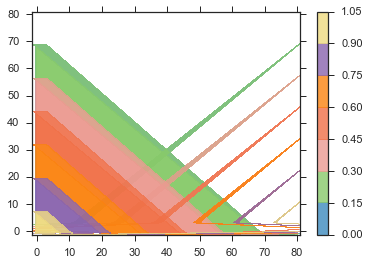

In [495]:
plt.subplot(1, 1, 1)
Z = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print (Z)
cp=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.colorbar(cp)
#plt.contourf(xx, yy, Z, levels=[-1,0,1])


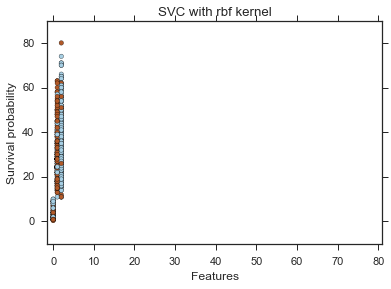

In [496]:
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(df2['sex'], df2['age'], c=y, cmap=plt.cm.Paired)
#plt.scatter(df2['age'], c=y, cmap=plt.cm.Paired)
plt.xlabel('Features')
plt.ylabel('Survival probability')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()

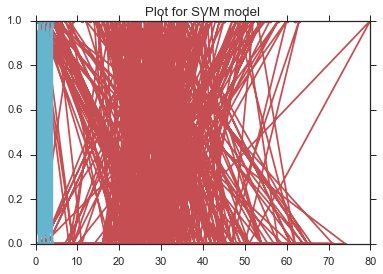

In [497]:
#Plot the physical model for above SVM algo

y_pred = svc0.predict(df2[predictor_var])
plt.plot(df2[predictor_var],y_pred)
plt.plot(df2[predictor_var],df2[outcome_var],'.')
plt.title('Plot for SVM model')




# RANDOM FOREST MODEL

In [498]:
# Generate SVM model
from sklearn import svm
# Create SVM classification object 
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True,
    tol=0.001, verbose=False) 
predictor_var = ['sex', 'age']
outcome_var = 'survived'
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 82.828%
Cross-Validation Score : 78.451%


In [500]:
# Generate SVM model
from sklearn import svm
# Create SVM classification object 
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True,
    tol=0.001, verbose=False) 
predictor_var = ['pclass', 'FareClass']
outcome_var = 'survived'
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 68.799%
Cross-Validation Score : 66.560%


In [501]:
#Generate Random Forest model
#model = RandomForestClassifier(n_estimators = 100)
model = RandomForestClassifier(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", min_samples_split = 20, min_samples_leaf = 20)
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'FareClass'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 82.941%
Cross-Validation Score : 80.701%


# Tune Random Forest model

In [502]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8294
AUC Score (Train): 0.895959
CV Score : Mean - 0.8765369 | Std - 0.03627047 | Min - 0.802139 | Max - 0.9243316


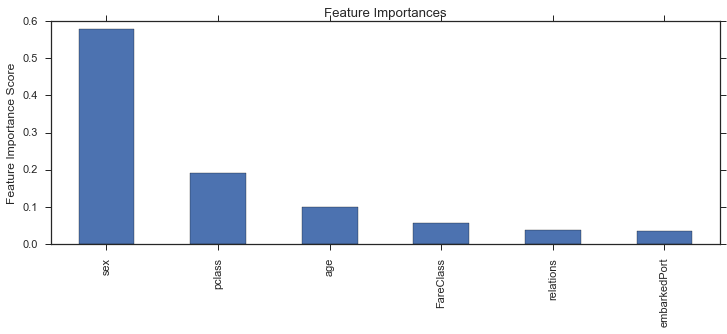

In [503]:
#Create baseline model with RF model
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
rfm0 = RandomForestClassifier(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", min_samples_split = 20, min_samples_leaf = 20)
modelfit(rfm0, df2, predictors)

In [504]:
#Use Grid Search for tuning the RF model
#Choose the optimum n_estimators and learning rate

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100]}

gsearch1 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 8, min_samples_split = 20, min_samples_leaf = 20), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



([mean: 0.86908, std: 0.02381, params: {'n_estimators': 20},
  mean: 0.86957, std: 0.02284, params: {'n_estimators': 30},
  mean: 0.87086, std: 0.02575, params: {'n_estimators': 40},
  mean: 0.87199, std: 0.02379, params: {'n_estimators': 50},
  mean: 0.87320, std: 0.02329, params: {'n_estimators': 60},
  mean: 0.87350, std: 0.02439, params: {'n_estimators': 70},
  mean: 0.87333, std: 0.02570, params: {'n_estimators': 80},
  mean: 0.87256, std: 0.02335, params: {'n_estimators': 90},
  mean: 0.87265, std: 0.02461, params: {'n_estimators': 100}],
 {'n_estimators': 70},
 0.87349729669581144)

In [507]:
#Find optimum min_sample_split and max_depth
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test2 = {'max_depth':[5,6,7,8,9,10,11], 'min_samples_split': [10,20,30,40,50,60,70]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =70,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 8, min_samples_split = 20, min_samples_leaf = 20), 
                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df2[predictors],df2[response])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.87010, std: 0.02242, params: {'min_samples_split': 10, 'max_depth': 5},
  mean: 0.87010, std: 0.02242, params: {'min_samples_split': 20, 'max_depth': 5},
  mean: 0.87010, std: 0.02242, params: {'min_samples_split': 30, 'max_depth': 5},
  mean: 0.87010, std: 0.02242, params: {'min_samples_split': 40, 'max_depth': 5},
  mean: 0.87082, std: 0.02126, params: {'min_samples_split': 50, 'max_depth': 5},
  mean: 0.87200, std: 0.02260, params: {'min_samples_split': 60, 'max_depth': 5},
  mean: 0.87167, std: 0.02367, params: {'min_samples_split': 70, 'max_depth': 5},
  mean: 0.87241, std: 0.02347, params: {'min_samples_split': 10, 'max_depth': 6},
  mean: 0.87241, std: 0.02347, params: {'min_samples_split': 20, 'max_depth': 6},
  mean: 0.87241, std: 0.02347, params: {'min_samples_split': 30, 'max_depth': 6},
  mean: 0.87241, std: 0.02347, params: {'min_samples_split': 40, 'max_depth': 6},
  mean: 0.87170, std: 0.02168, params: {'min_samples_split': 50, 'max_depth': 6},
  mean: 0.87255,

In [510]:
#Check optimum min_sample_leaf for a range min_sample_split
param_test3 = {'min_samples_split':[10,20,30,40,50,60,70], 'min_samples_leaf': [5,10,15,20,25,30,35,40]}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =70,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 10, min_samples_split = 10, min_samples_leaf = 20), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.88252, std: 0.03759, params: {'min_samples_split': 10, 'min_samples_leaf': 5},
  mean: 0.87766, std: 0.03846, params: {'min_samples_split': 20, 'min_samples_leaf': 5},
  mean: 0.87817, std: 0.03554, params: {'min_samples_split': 30, 'min_samples_leaf': 5},
  mean: 0.87746, std: 0.03044, params: {'min_samples_split': 40, 'min_samples_leaf': 5},
  mean: 0.87098, std: 0.03210, params: {'min_samples_split': 50, 'min_samples_leaf': 5},
  mean: 0.87342, std: 0.03068, params: {'min_samples_split': 60, 'min_samples_leaf': 5},
  mean: 0.87095, std: 0.02963, params: {'min_samples_split': 70, 'min_samples_leaf': 5},
  mean: 0.87755, std: 0.03131, params: {'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: 0.87755, std: 0.03131, params: {'min_samples_split': 20, 'min_samples_leaf': 10},
  mean: 0.87734, std: 0.03024, params: {'min_samples_split': 30, 'min_samples_leaf': 10},
  mean: 0.87564, std: 0.02818, params: {'min_samples_split': 40, 'min_samples_leaf': 10},
  mean: 0.87167, 

In [513]:
#Tune max_feature
param_test4 = {'max_features': [2,3,4,5]}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =70,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 10, min_samples_split = 10, min_samples_leaf = 5), 
                        param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df2[predictors],df2[response])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_



([mean: 0.88252, std: 0.03759, params: {'max_features': 2},
  mean: 0.88473, std: 0.03959, params: {'max_features': 3},
  mean: 0.88509, std: 0.03807, params: {'max_features': 4},
  mean: 0.88514, std: 0.03734, params: {'max_features': 5}],
 {'max_features': 5},
 0.88513731427226572)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8844
AUC Score (Train): 0.947989
CV Score : Mean - 0.8897154 | Std - 0.05127782 | Min - 0.7778075 | Max - 0.9612299


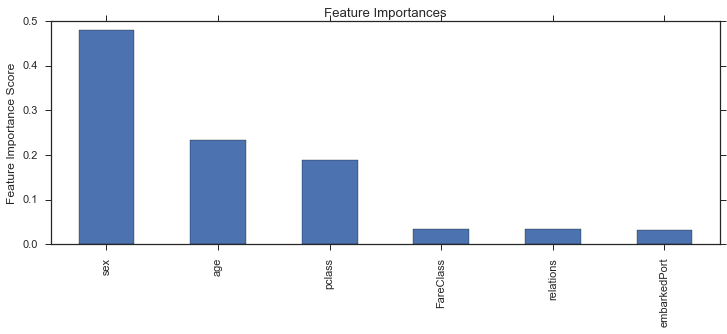

In [514]:
#Calibrate with RF 
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
rfm0 = RandomForestClassifier(n_estimators =70,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = 5, max_depth = 10, min_samples_split = 10, min_samples_leaf = 5)
modelfit(rfm0, df2, predictors)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8855
AUC Score (Train): 0.948383
CV Score : Mean - 0.8899516 | Std - 0.05174704 | Min - 0.7751337 | Max - 0.9649733


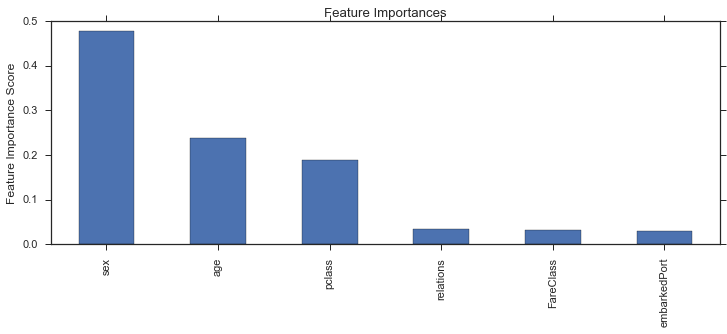

In [519]:
# Check for different n_estimators
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
rfm0 = RandomForestClassifier(n_estimators =100,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = 5, max_depth = 10, min_samples_split = 10, min_samples_leaf = 5)
modelfit(rfm0, df2, predictors)

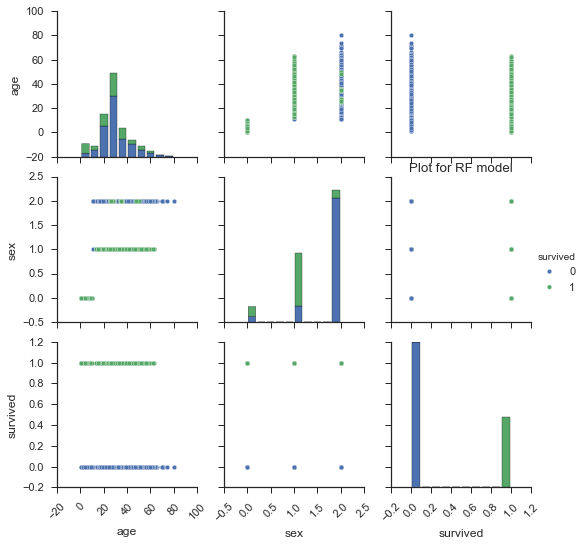

In [520]:
#Plot the physical model for above RF algo

y_pred = rfm0.predict(df2[predictors])
#plt.plot(df2[predictors],y_pred)
#plt.plot(df2[predictors],df2[response])
#plt.title('Plot for RF model')

df_rfmo = pd.DataFrame(y_pred, columns=["survived"])
df2_rfm = df2[['age', 'sex']]
df_rfmc = df2_rfm.merge(right=df_rfmo, how='inner', left_index=True, right_index=True, sort=False)
g = sns.pairplot(df_rfmc[["age", "sex", "survived"]], hue="survived", diag_kind="hist")  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.title('Plot for RF model')


# NAIVE BAYES MODEL

In [522]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'FareClass'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 77.217%
Cross-Validation Score : 76.332%


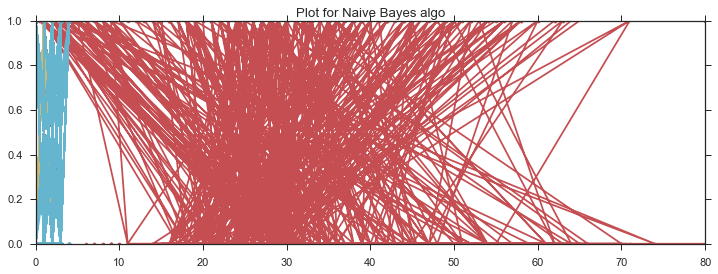

In [523]:
#Plot the physical model for above Naive Bayes algo

y_pred = model.predict(df2[predictor_var])
plt.plot(df2[predictors],y_pred)
plt.plot(df2[predictors],df2[outcome_var],'.')
plt.title('Plot for Naive Bayes algo')



# Decision Tree model

In [524]:
from sklearn import tree
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'FareClass'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 95.174%
Cross-Validation Score : 81.709%


# Gradient Boosting 

In [525]:
#Generate Gradient Boosting ensembling model
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'FareClass'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 88.889%
Cross-Validation Score : 82.607%


# Tuning GBM

In [112]:
#Add column name to the index in the Dataframe
df2.index.name = 'ID'




In [526]:
#Convert all data types to numeric for SCikit

from sklearn.preprocessing import LabelEncoder
var_mod = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'survived', 'FareClass']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df1[i])
df2.dtypes 



/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


pclass          int64
sex             int64
age             int64
CabinID         int64
embarkedPort    int64
relations       int64
FareClass       int64
survived        int64
dtype: object

In [527]:
#Import the libraries
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'

In [528]:
#define a function which will help us create GBM models and perform cross-validation.

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
  
    dtrain['survived'] = label_binarize(dtrain['survived'], classes=[0, 1])
    alg.fit(dtrain[predictors], dtrain['survived'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['survived'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8889
AUC Score (Train): 0.945606
CV Score : Mean - 0.8938871 | Std - 0.04172735 | Min - 0.7959893 | Max - 0.9548128


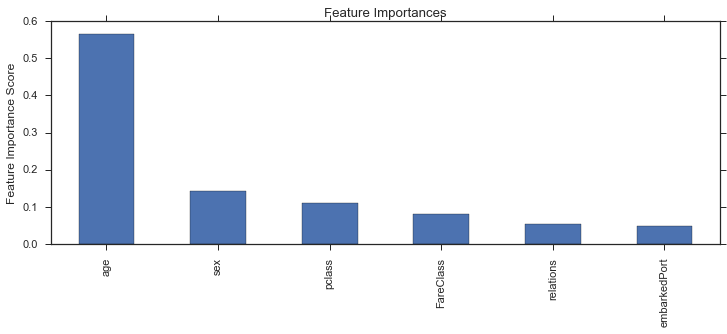

In [529]:
#Create baseline model with GBM
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, df2, predictors)

In [531]:
#Choose the optimum n_estimators and learning rate

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100]}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=20,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



([mean: 0.87980, std: 0.03222, params: {'n_estimators': 20},
  mean: 0.88627, std: 0.03466, params: {'n_estimators': 30},
  mean: 0.88743, std: 0.03367, params: {'n_estimators': 40},
  mean: 0.88851, std: 0.03474, params: {'n_estimators': 50},
  mean: 0.89049, std: 0.03625, params: {'n_estimators': 60},
  mean: 0.89040, std: 0.03708, params: {'n_estimators': 70},
  mean: 0.88944, std: 0.03678, params: {'n_estimators': 80},
  mean: 0.88934, std: 0.03873, params: {'n_estimators': 90},
  mean: 0.88994, std: 0.03807, params: {'n_estimators': 100}],
 {'n_estimators': 60},
 0.8904910119757371)

In [532]:
#Choose the optimum n_estimators and learning rate

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100]}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=20,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_





([mean: 0.88069, std: 0.03199, params: {'n_estimators': 20},
  mean: 0.88385, std: 0.03157, params: {'n_estimators': 30},
  mean: 0.88319, std: 0.03319, params: {'n_estimators': 40},
  mean: 0.88337, std: 0.03294, params: {'n_estimators': 50},
  mean: 0.88637, std: 0.03324, params: {'n_estimators': 60},
  mean: 0.88562, std: 0.03659, params: {'n_estimators': 70},
  mean: 0.88627, std: 0.03670, params: {'n_estimators': 80},
  mean: 0.88737, std: 0.03746, params: {'n_estimators': 90},
  mean: 0.88824, std: 0.03820, params: {'n_estimators': 100}],
 {'n_estimators': 100},
 0.88823610645984485)

In [534]:
#Tune n_estimator further with smaller increments

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'n_estimators':[60,65,70,75,80,90,100,110,120,130,140]}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=20,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88637, std: 0.03324, params: {'n_estimators': 60},
  mean: 0.88657, std: 0.03507, params: {'n_estimators': 65},
  mean: 0.88562, std: 0.03659, params: {'n_estimators': 70},
  mean: 0.88680, std: 0.03645, params: {'n_estimators': 75},
  mean: 0.88627, std: 0.03670, params: {'n_estimators': 80},
  mean: 0.88737, std: 0.03746, params: {'n_estimators': 90},
  mean: 0.88824, std: 0.03820, params: {'n_estimators': 100},
  mean: 0.88698, std: 0.03955, params: {'n_estimators': 110},
  mean: 0.88634, std: 0.03955, params: {'n_estimators': 120},
  mean: 0.88747, std: 0.03872, params: {'n_estimators': 130},
  mean: 0.88777, std: 0.03864, params: {'n_estimators': 140}],
 {'n_estimators': 100},
 0.88823610645984485)

In [535]:
#Find optimum min_sample_split and max_depth
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test2 = {'max_depth':[5,10,2], 'min_samples_split': [20,60,20]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df2[predictors],df2[response])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.88783, std: 0.03853, params: {'min_samples_split': 20, 'max_depth': 5},
  mean: 0.88908, std: 0.03570, params: {'min_samples_split': 60, 'max_depth': 5},
  mean: 0.88783, std: 0.03853, params: {'min_samples_split': 20, 'max_depth': 5},
  mean: 0.88022, std: 0.04000, params: {'min_samples_split': 20, 'max_depth': 10},
  mean: 0.88895, std: 0.04001, params: {'min_samples_split': 60, 'max_depth': 10},
  mean: 0.88022, std: 0.04000, params: {'min_samples_split': 20, 'max_depth': 10},
  mean: 0.87795, std: 0.02366, params: {'min_samples_split': 20, 'max_depth': 2},
  mean: 0.87907, std: 0.02286, params: {'min_samples_split': 60, 'max_depth': 2},
  mean: 0.87795, std: 0.02366, params: {'min_samples_split': 20, 'max_depth': 2}],
 {'max_depth': 5, 'min_samples_split': 60},
 0.88907955763079072)

In [537]:
#Tune max_depth and min_sample_splits further
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test2 = {'max_depth':[5,10,15,20], 'min_samples_split': [50,55,60,65,70]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df2[predictors],df2[response])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.88957, std: 0.03508, params: {'min_samples_split': 50, 'max_depth': 5},
  mean: 0.88946, std: 0.03271, params: {'min_samples_split': 55, 'max_depth': 5},
  mean: 0.88908, std: 0.03570, params: {'min_samples_split': 60, 'max_depth': 5},
  mean: 0.88597, std: 0.03525, params: {'min_samples_split': 65, 'max_depth': 5},
  mean: 0.88683, std: 0.03444, params: {'min_samples_split': 70, 'max_depth': 5},
  mean: 0.88765, std: 0.04121, params: {'min_samples_split': 50, 'max_depth': 10},
  mean: 0.88692, std: 0.04145, params: {'min_samples_split': 55, 'max_depth': 10},
  mean: 0.88895, std: 0.04001, params: {'min_samples_split': 60, 'max_depth': 10},
  mean: 0.88912, std: 0.04259, params: {'min_samples_split': 65, 'max_depth': 10},
  mean: 0.88816, std: 0.04195, params: {'min_samples_split': 70, 'max_depth': 10},
  mean: 0.88583, std: 0.04207, params: {'min_samples_split': 50, 'max_depth': 15},
  mean: 0.88725, std: 0.04184, params: {'min_samples_split': 55, 'max_depth': 15},
  mean: 0

In [538]:
#Check optimum min_sample_leaf for a range min_sample_split
param_test3 = {'min_samples_split':[50,55,60,65,70,75], 'min_samples_leaf': [5,10,15,20,25]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.89006, std: 0.03599, params: {'min_samples_split': 50, 'min_samples_leaf': 5},
  mean: 0.88832, std: 0.03636, params: {'min_samples_split': 55, 'min_samples_leaf': 5},
  mean: 0.89021, std: 0.03626, params: {'min_samples_split': 60, 'min_samples_leaf': 5},
  mean: 0.88698, std: 0.03760, params: {'min_samples_split': 65, 'min_samples_leaf': 5},
  mean: 0.88886, std: 0.03387, params: {'min_samples_split': 70, 'min_samples_leaf': 5},
  mean: 0.88940, std: 0.03433, params: {'min_samples_split': 75, 'min_samples_leaf': 5},
  mean: 0.89114, std: 0.03363, params: {'min_samples_split': 50, 'min_samples_leaf': 10},
  mean: 0.89031, std: 0.03381, params: {'min_samples_split': 55, 'min_samples_leaf': 10},
  mean: 0.89118, std: 0.03470, params: {'min_samples_split': 60, 'min_samples_leaf': 10},
  mean: 0.88989, std: 0.03422, params: {'min_samples_split': 65, 'min_samples_leaf': 10},
  mean: 0.89030, std: 0.03224, params: {'min_samples_split': 70, 'min_samples_leaf': 10},
  mean: 0.88799,

In [539]:
#Tune max_feature
param_test4 = {'max_features': [2,3,4,5]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=5, min_samples_split=60, min_samples_leaf=10, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df2[predictors],df2[response])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_



([mean: 0.89118, std: 0.03470, params: {'max_features': 2},
  mean: 0.89213, std: 0.03522, params: {'max_features': 3},
  mean: 0.89392, std: 0.03446, params: {'max_features': 4},
  mean: 0.89365, std: 0.03568, params: {'max_features': 5}],
 {'max_features': 4},
 0.89392051276034934)

In [540]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=5, min_samples_split=60, min_samples_leaf=10, max_features=4, subsample=0.8, random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(df2[predictors],df2[response])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.89430, std: 0.03421, params: {'subsample': 0.6},
  mean: 0.89292, std: 0.03394, params: {'subsample': 0.7},
  mean: 0.89400, std: 0.03562, params: {'subsample': 0.75},
  mean: 0.89392, std: 0.03446, params: {'subsample': 0.8},
  mean: 0.89282, std: 0.03642, params: {'subsample': 0.85},
  mean: 0.89427, std: 0.03552, params: {'subsample': 0.9}],
 {'subsample': 0.6},
 0.8943003209551581)

In [125]:
# The optimum parameters -
#Learnng Rate = 0.05
#n_estimators = 80
#max_depth = 2
#min_samples_split = 60
#min_samples_leaf = 15
#max_featues = 4
#sub sample = 0.75

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8777
AUC Score (Train): 0.936426
CV Score : Mean - 0.8977302 | Std - 0.04205551 | Min - 0.8016043 | Max - 0.963369


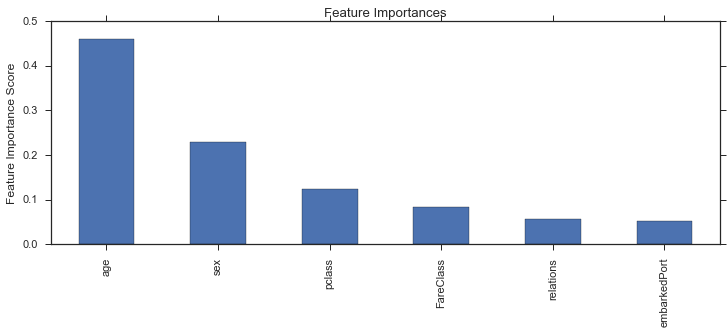

In [541]:
#Check model score
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
gbm0 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=5, min_samples_split=60, min_samples_leaf=10, max_features=4, subsample=0.6, random_state=10)
                                   
modelfit(gbm0, df2, predictors)

# Optimize learning_rate and n_estimators


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8833
AUC Score (Train): 0.942751
CV Score : Mean - 0.8984974 | Std - 0.04190929 | Min - 0.8037433 | Max - 0.9639037


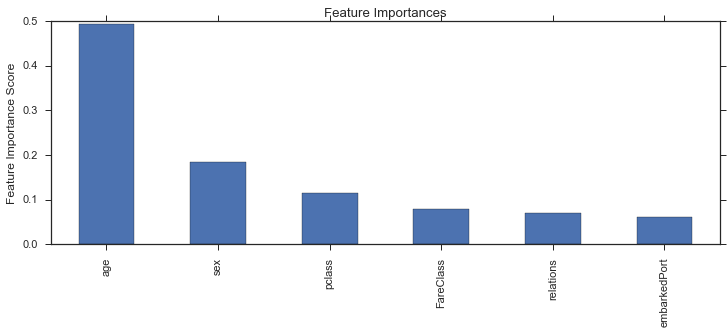

In [552]:
#Check model score
#Increase the n_estimators to 500
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
gbm0 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=140,max_depth=5, min_samples_split=60, min_samples_leaf=10, max_features=4, subsample=0.6, random_state=10)
                                   
modelfit(gbm0, df2, predictors)

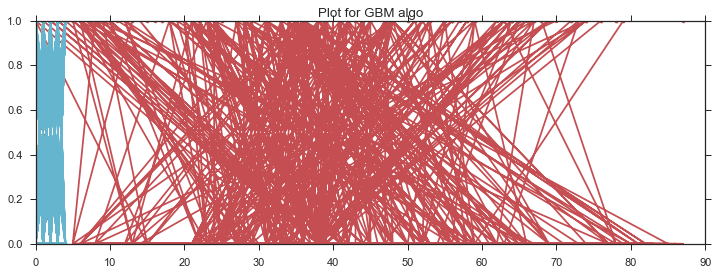

In [553]:
#Plot the physical model for above GBM algo

y_pred = gbm0.predict(df2[predictors])
plt.plot(df2[predictors],y_pred)
plt.plot(df2[predictors],df2[response],'.')
plt.title('Plot for GBM algo')




In [129]:
# Final parameters
#n_estimator = 700
#learning_rate = 0.01
#min_sample_split = 70
#max_depth =10
#min_sample_leaf = 20
#max_features = 5
#sub sample = 0.6

# Xtream Gradient Boosting / XGB

In [554]:
#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'


In [555]:
#Define a function which will help us create XGBoost models and perform cross-validation.

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=20):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['survived'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['survived'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['survived'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'], dtrain_predprob))
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))          
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [556]:
#Consider first round estimates of the paarmeters as follows -
#learning_rate = 0.1
#n_estimators = 100
#max_depth = 5
#min_child_weight = 1
#gamma = 0
#subsample, colsample_bytree = 0.8
#scale_pos_weight = 1  #greater than 0 for high class imbalance


Model Report
Accuracy : 0.8721
AUC Score (Train): 0.932283
CV Score : Mean - 0.9012485 | Std - 0.04267747 | Min - 0.7994652 | Max - 0.9558824


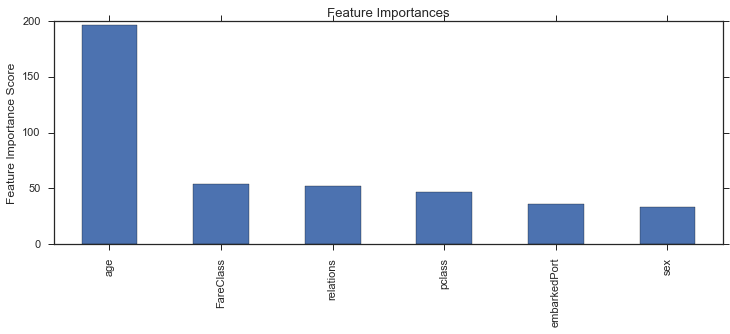

In [557]:
#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 seed=10)
modelfit(xgb1, df2, predictors)

In [558]:
#Find optimum n_estimators for learning_rate = 0.1

predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test0 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100, 110,120,130,140,150]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.89673, std: 0.03179, params: {'n_estimators': 20},
  mean: 0.89726, std: 0.03299, params: {'n_estimators': 30},
  mean: 0.89730, std: 0.03298, params: {'n_estimators': 40},
  mean: 0.89624, std: 0.03445, params: {'n_estimators': 50},
  mean: 0.89629, std: 0.03487, params: {'n_estimators': 60},
  mean: 0.89569, std: 0.03529, params: {'n_estimators': 70},
  mean: 0.89487, std: 0.03673, params: {'n_estimators': 80},
  mean: 0.89625, std: 0.03623, params: {'n_estimators': 90},
  mean: 0.89492, std: 0.03713, params: {'n_estimators': 100},
  mean: 0.89492, std: 0.03717, params: {'n_estimators': 110},
  mean: 0.89465, std: 0.03729, params: {'n_estimators': 120},
  mean: 0.89306, std: 0.03770, params: {'n_estimators': 130},
  mean: 0.89168, std: 0.03779, params: {'n_estimators': 140},
  mean: 0.89133, std: 0.03820, params: {'n_estimators': 150}],
 {'n_estimators': 40},
 0.8972975899211264)

In [559]:
#Further fine tune n_estimators
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test0 = {'n_estimators':[20,25,30,35,40]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=80, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.89673, std: 0.03179, params: {'n_estimators': 20},
  mean: 0.89514, std: 0.03345, params: {'n_estimators': 25},
  mean: 0.89726, std: 0.03299, params: {'n_estimators': 30},
  mean: 0.89692, std: 0.03426, params: {'n_estimators': 35},
  mean: 0.89730, std: 0.03298, params: {'n_estimators': 40}],
 {'n_estimators': 40},
 0.8972975899211264)

In [560]:
#Tune nax_depth ad min_child_weight with n_estimators = 40
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'max_depth':[20,60,20], 'min_child_weight': [5,15,5]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 20},
  mean: 0.88092, std: 0.02089, params: {'min_child_weight': 15, 'max_depth': 20},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 20},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 60},
  mean: 0.88092, std: 0.02089, params: {'min_child_weight': 15, 'max_depth': 60},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 60},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 20},
  mean: 0.88092, std: 0.02089, params: {'min_child_weight': 15, 'max_depth': 20},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 20}],
 {'max_depth': 20, 'min_child_weight': 5},
 0.89585993976224854)

In [561]:
#Check max_depth and min_child_weight a little further
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'max_depth':[10,15,20,25,30,35], 'min_child_weight': [4,5,6]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=20,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.89808, std: 0.03254, params: {'min_child_weight': 4, 'max_depth': 10},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 10},
  mean: 0.89390, std: 0.02971, params: {'min_child_weight': 6, 'max_depth': 10},
  mean: 0.89808, std: 0.03254, params: {'min_child_weight': 4, 'max_depth': 15},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 15},
  mean: 0.89390, std: 0.02971, params: {'min_child_weight': 6, 'max_depth': 15},
  mean: 0.89808, std: 0.03254, params: {'min_child_weight': 4, 'max_depth': 20},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 20},
  mean: 0.89390, std: 0.02971, params: {'min_child_weight': 6, 'max_depth': 20},
  mean: 0.89808, std: 0.03254, params: {'min_child_weight': 4, 'max_depth': 25},
  mean: 0.89586, std: 0.03187, params: {'min_child_weight': 5, 'max_depth': 25},
  mean: 0.89390, std: 0.02971, params: {'min_child_weight': 6, 'max_depth': 25},
  mean: 0.89808, std: 0.0325

In [562]:
#Tune Gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=10,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.89808, std: 0.03254, params: {'gamma': 0.0},
  mean: 0.89814, std: 0.03304, params: {'gamma': 0.1},
  mean: 0.89897, std: 0.03310, params: {'gamma': 0.2},
  mean: 0.89896, std: 0.03346, params: {'gamma': 0.3},
  mean: 0.89808, std: 0.03219, params: {'gamma': 0.4}],
 {'gamma': 0.2},
 0.89896634521379359)


Model Report
Accuracy : 0.8743
AUC Score (Train): 0.931263
CV Score : Mean - 0.9013381 | Std - 0.04047927 | Min - 0.8106952 | Max - 0.9606952


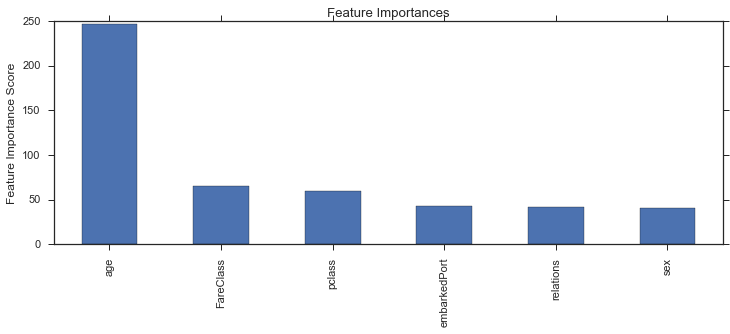

In [563]:
#Re calibrate the model with optimal values determined so far
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=40,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 seed=10)
modelfit(xgb1, df2, predictors)

In [564]:
#Tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.89352, std: 0.02994, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.89325, std: 0.03115, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.89481, std: 0.03087, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.89342, std: 0.03297, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.89411, std: 0.03303, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.89389, std: 0.03496, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.89897, std: 0.03310, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.89640, std: 0.03640, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.89411, std: 0.03303, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.89389, std: 0.03496, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.89897, std: 0.03310, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.89640, std: 0.03640, params: {'colsample_bytree': 0.8, 'subsample'

In [565]:
#Redetermine subsample and colsample_bytree further
param_test5 = {
 'subsample':[i/10.0 for i in range(7,8,9)],
 'colsample_bytree':[i/10.0 for i in range(6,8)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)
gsearch5.fit(df2[predictors],df2[response])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.89325, std: 0.03115, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.89389, std: 0.03496, params: {'colsample_bytree': 0.7, 'subsample': 0.7}],
 {'colsample_bytree': 0.7, 'subsample': 0.7},
 0.89388995838390473)

In [566]:
#Tune regularization parameters
#Alpha
param_test6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.89389, std: 0.03496, params: {'reg_alpha': 1e-05},
  mean: 0.89363, std: 0.03518, params: {'reg_alpha': 0.01},
  mean: 0.89518, std: 0.03477, params: {'reg_alpha': 0.1},
  mean: 0.89297, std: 0.03066, params: {'reg_alpha': 1},
  mean: 0.78174, std: 0.02761, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.1},
 0.89518262767992929)

In [573]:
#Re tune reg_alpha
param_test6 = {'reg_alpha':[0.005, 0.008, 0.01, 0.02,0.05]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.89363, std: 0.03514, params: {'reg_alpha': 0.005},
  mean: 0.89363, std: 0.03518, params: {'reg_alpha': 0.008},
  mean: 0.89363, std: 0.03518, params: {'reg_alpha': 0.01},
  mean: 0.89352, std: 0.03517, params: {'reg_alpha': 0.02},
  mean: 0.89479, std: 0.03491, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.05},
 0.89479473339177917)

In [574]:
#Tune regularization parameters
#Tune reg-lambda
param_test6 = {'reg_lambda':[0.0008, 0.0009, 0.001, 0.002, 0.003]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', reg_alpha = 0.02, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.89655, std: 0.03325, params: {'reg_lambda': 0.0008},
  mean: 0.89655, std: 0.03325, params: {'reg_lambda': 0.0009},
  mean: 0.89655, std: 0.03325, params: {'reg_lambda': 0.001},
  mean: 0.89650, std: 0.03333, params: {'reg_lambda': 0.002},
  mean: 0.89650, std: 0.03333, params: {'reg_lambda': 0.003}],
 {'reg_lambda': 0.0008},
 0.89655270412186339)

In [575]:
#Further tune the lambda
param_test6 = {'reg_lambda':[0.002, 0.003, 0.004]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=40, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', reg_alpha = 0.005, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.89706, std: 0.03371, params: {'reg_lambda': 0.002},
  mean: 0.89706, std: 0.03371, params: {'reg_lambda': 0.003},
  mean: 0.89712, std: 0.03372, params: {'reg_lambda': 0.004}],
 {'reg_lambda': 0.004},
 0.89711569814857073)


Model Report
Accuracy : 0.8676
AUC Score (Train): 0.927596
CV Score : Mean - 0.9009421 | Std - 0.04144479 | Min - 0.8048128 | Max - 0.9585561


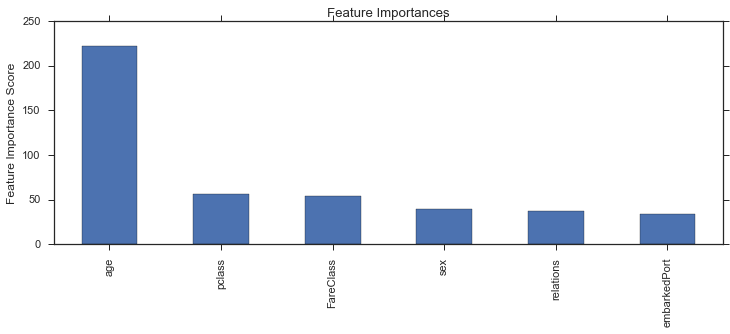

In [576]:
#Re calibrate the model
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=40,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
# reg_alpha = 0.002,
# reg_lambda = 0.002,
 seed=10)
modelfit(xgb1, df2, predictors)


Model Report
Accuracy : 0.881
AUC Score (Train): 0.939156
CV Score : Mean - 0.9024626 | Std - 0.04151126 | Min - 0.8069519 | Max - 0.9692513


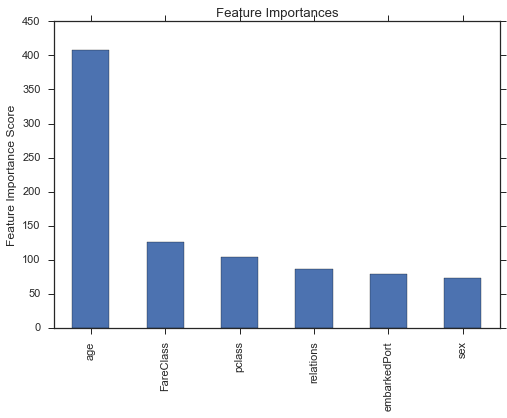

In [702]:
#Do some permu combi with learning rate and n_estimators and track the scores
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=80,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 seed=10)
modelfit(xgb1, df2, predictors)

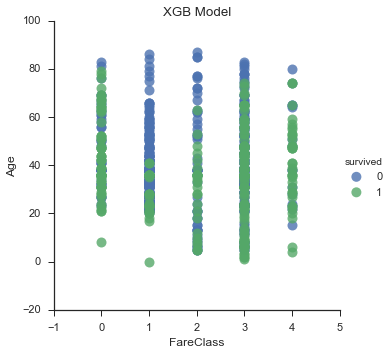

In [594]:
#Plot the physical model for above XGB prediction
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

y_pred = xgb1.predict(df2[predictors])

df_xgbo = pd.DataFrame(y_pred, columns=["survived"])
df_xgbi = df2[['age', 'FareClass']]
df_xgbc = df_xgbi.merge(right=df_xgbo, how='inner', left_index=True, right_index=True, sort=False)

sns.lmplot('FareClass', 'age', 
           data=df_xgbc, 
           fit_reg=False, 
           hue="survived",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('XGB Model')
plt.xlabel('FareClass')
plt.ylabel('Age')


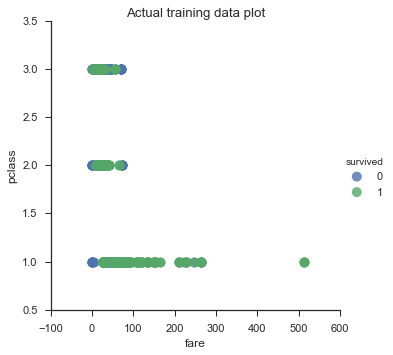

In [708]:
#Plot the actual training data
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('fare', 'pclass', 
           data=df, 
           fit_reg=False, 
           hue="survived",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Actual training data plot')
plt.xlabel('fare')
plt.ylabel('pclass')

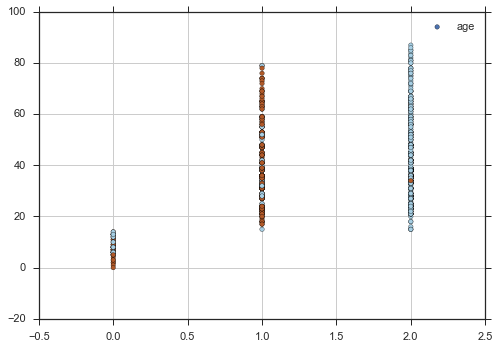

In [705]:
y = xgb1.predict(df2[predictors])
#y = df2['survived']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(df2['sex'], df2['age'], c=y, cmap=plt.cm.Paired)
handles,labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels, loc='upper right')
ax.legend(handles, labels)
ax.grid()
plt.show()

# Stacking algorithm

In [658]:
#Import the libraries
import brew
from brew.base import Ensemble
from brew.combination.combiner import Combiner
from brew.stacking.stacker import EnsembleStack
from brew.base import EnsembleClassifier
from brew.stacking.stacker import EnsembleStackClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'

In [659]:
#Define a function which will help us create stacking models and perform cross-validation.

def modelfitStacking(alg, dtrain, predictors, outcome, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    
    dtrain['survived'] = label_binarize(dtrain['survived'], classes=[0, 1])
    
    #Special code for Stacking/ Blending to convert dataframes in Numpy array
    X=[]
    y=[]
    X = dtrain[predictors].values
    y = dtrain['survived'].values
#    alg.fit(dtrain[predictors], dtrain['survived'])
    alg.fit(X, y)
    #Predict training set:
    #dtrain_predictions = alg.predict(dtrain[predictors])
    predictions = model.predict(X)
    dtrain_predprob = alg.predict_proba(dtrain[predictors].values)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y, predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'].values, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    

In [660]:
#Generic function for making a classification model and accessing performance:
def StackingClassification_model(model, data, predictors, outcome):
    #Fit the model:
  
  #Special code for Stacking/ Blending to convert dataframes in Numpy array
    X=[]
    y=[]
    X = data[predictors].values
    y = data['survived'].values
    #model.fit(data[predictors],data[outcome])
    model.fit(X,y)
  
  #Make predictions on training set:
    #predictions = model.predict(data[predictors])
    predictions = model.predict(X)
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions, y)
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 10 folds
    kf = KFold(data.shape[0], n_folds=10)
    error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        train_predictors = train_predictors.values
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
        train_target = train_target.values
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
       #error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        test_predictors = (data[predictors].iloc[test,:])
        test_predictors = test_predictors.values

        test_target = (data[outcome].iloc[test])
        test_target = test_target.values
        
        error.append(model.score(test_predictors, test_target))
        #scores = cross_validation.cross_val_score(esc0, test_predictors, test_target)
        
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    #model.fit(data[predictors],data[outcome]) 
    model.fit(X,y) 

In [661]:
#define a function which will help us create different models and perform cross-validation.

def EnsembleModelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
  
    dtrain['survived'] = label_binarize(dtrain['survived'], classes=[0, 1])
    alg.fit(dtrain[predictors], dtrain['survived'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['survived'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [662]:
from sklearn.ensemble import VotingClassifier
#Set up the Stacking algo
#predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
clf1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=695,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 #reg_alpha = 1e-10,
 #reg_lambda = 0.002,
 seed=10) #----- XGB
clf2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=690,max_depth=10,min_samples_split=70, 
     min_samples_leaf=20, subsample=0.6, random_state=10, max_features=5)
#----GBM
clf3 = RandomForestClassifier(n_estimators =250,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5) #---RFM
           
clf4 = svm.SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, 
            gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001, 
            verbose=False)

clf5 = GaussianNB()

clf6 = LogisticRegression()

clf7 = KNeighborsClassifier(n_neighbors=5)

clf8 = tree.DecisionTreeClassifier(criterion='gini')

estimators = []
estimators.append(('xgb', clf1))
estimators.append(('gbm', clf2))
estimators.append(('rfm', clf3))
estimators.append(('svm', clf4))
estimators.append(('gnb', clf5))
estimators.append(('lgr', clf6))
estimators.append(('knn', clf7))
estimators.append(('dtc', clf8))

ensemble = VotingClassifier(estimators, voting='soft', weights=[8,5,2,3,1,1,1,1])

outcome = 'survived'
predictors = ['pclass', 'sex', 'age', 'embarkedPort', 'relations', 'FareClass']

#StackingClassification_model(ensemble, df2, predictors, outcome)


modelfitStacking(ensemble, df2, predictors, outcome)
 

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.7755
AUC Score (Train): 0.952135
CV Score : Mean - 0.8992704 | Std - 0.04496407 | Min - 0.7930481 | Max - 0.9622995


In [663]:
#Optimizing weight of Voting Classifier by generating weight table 
np.random.seed(123)
from datetime import datetime
import time

X=[]
y=[]
X = df2[predictors].values
y = df2['survived'].values

columns = ['w1', 'w2', 'w3', 'w4', 'mean', 'std']

w = []
d =[]

d.append(columns)

estimators = []
estimators.append(('xgb', clf1))
#estimators.append(('gbm', clf2))
estimators.append(('rfm', clf3))
estimators.append(('svm', clf4))
#estimators.append(('gnb', clf5))
#estimators.append(('lgr', clf6))
estimators.append(('knn', clf7))
#estimators.append(('dtc', clf8))

print ("Starting to loop on " + time.strftime("%c"))
i = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):
            for w4 in range(1,4):
                #for w5 in range(1,8):
                    #for w6 in range(1,8):
                        #for w7 in range(1,8):
                            #for w8 in range(1,8):
                                if len(set((w1,w2,w3,w4))) == 1: # skip if all weights are equal
                                    continue
                                
                                w.append(w1)
                                w.append(w2)
                                w.append(w3)
                                w.append(w4)
                                #w.append(w5)
                                #w.append(w6)
                                #w.append(w7)
                                #w.append(w8)
                                
                                eclf = VotingClassifier(estimators, weights=w)
                                scores = cross_validation.cross_val_score(
                                            estimator=eclf,
                                            X=X,
                                            y=y,
                                            cv=5,
                                            scoring='accuracy',
                                            n_jobs=1)
                                
                                w.append(scores.mean())
                                w.append(scores.std())
                                
                                d.append(w)
                                
                                w = []
                                
                                i += 1
                                
print ("Generating dataframe " + time.strftime("%c"))
dfw = pd.DataFrame(d, columns=columns)
dfw = dfw[dfw.w1 != 'w1']
dfw[['w1', 'w2', 'w3', 'w4', 'mean', 'std']] = dfw[['w1', 'w2', 'w3', 'w4',  'mean', 'std']].apply(pd.to_numeric)
dfw.sort_values(['mean', 'std'], ascending=[False, True], inplace=True)
print ("Ending process at " + time.strftime("%c"))

Starting to loop on Sat Oct 29 22:45:32 2016
Generating dataframe Sat Oct 29 22:55:48 2016
Ending process at Sat Oct 29 22:55:49 2016


In [664]:
#Display the Stacking weight dataframe
dfw

,w1,w2,w3,w4,mean,std
9,1,2,1,1,0.831760,0.029335
19,1,3,1,2,0.831760,0.029335
21,1,3,2,1,0.831760,0.029335
44,2,3,1,1,0.831760,0.029335
48,2,3,2,2,0.831760,0.029335
45,2,3,1,2,0.831754,0.027126
37,2,2,1,2,0.830624,0.025330
46,2,3,1,3,0.830624,0.025330
64,3,2,1,3,0.830624,0.025330
72,3,3,1,2,0.830624,0.025330


In [665]:
#Recalibrate with Voting Classifier
from sklearn.ensemble import VotingClassifier
#Set up the Stacking algo
#predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
clf1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=695,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 #reg_alpha = 1e-10,
 #reg_lambda = 0.002,
 seed=10) #----- XGB
#clf2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=690,max_depth=10,min_samples_split=70, 
#     min_samples_leaf=20, subsample=0.6, random_state=10, max_features=5)
#----GBM
clf3 = RandomForestClassifier(n_estimators =250,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5) #---RFM
           
clf4 = svm.SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, 
            gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001, 
            verbose=False)

#clf5 = GaussianNB()

#clf6 = LogisticRegression()

clf7 = KNeighborsClassifier(n_neighbors=5)

#clf8 = tree.DecisionTreeClassifier(criterion='gini')

estimators = []
estimators.append(('xgb', clf1))
#estimators.append(('gbm', clf2))
estimators.append(('rfm', clf3))
estimators.append(('svm', clf4))
#estimators.append(('gnb', clf5))
#estimators.append(('lgr', clf6))
estimators.append(('knn', clf7))
#estimators.append(('dtc', clf8))

ensemble1 = VotingClassifier(estimators, voting='soft', weights=[1,2,1,1])

outcome = 'survived'
predictors = ['pclass', 'sex', 'age', 'embarkedPort', 'relations', 'FareClass']

#StackingClassification_model(ensemble, df2, predictors, outcome)


modelfitStacking(ensemble1, df2, predictors, outcome)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.7755
AUC Score (Train): 0.954356
CV Score : Mean - 0.8967039 | Std - 0.04793693 | Min - 0.7914439 | Max - 0.9596257


In [200]:

#Set up the Stacking and Blending model using logistic regression
#predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
layer_1 = [XGBClassifier(
 learning_rate =0.01,
 n_estimators=695,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 #reg_alpha = 1e-10,
 #reg_lambda = 0.002,
 seed=10), #----- XGB
# GradientBoostingClassifier(learning_rate=0.01, n_estimators=690,max_depth=10,min_samples_split=70, min_samples_leaf=20, subsample=0.6, random_state=10, max_features=5),
 #----GBM
           RandomForestClassifier(n_estimators =250,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5),
           #---RFM
    svm.SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma=0, kernel='rbf', max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001, verbose=False),
#---SVM
    GaussianNB(), #---GNB
           
    KNeighborsClassifier(n_neighbors=7), #---KNN
           
    tree.DecisionTreeClassifier(criterion='gini')] #---Decision tree

layer_2 = [LogisticRegression(max_iter=500)]
           
stack = EnsembleStack(cv=10) # number of folds per layer
stack.add_layer(Ensemble(layer_1))
stack.add_layer(Ensemble(layer_2))

## the Combiner options can be 'majority_vote', 'max', 'min', 'mean' or 'median'
esc0 = EnsembleStackClassifier(stack, Combiner('mean'))

outcome = 'survived'
predictors = ['pclass', 'sex', 'age', 'embarkedPort', 'relations']

X=[]
y=[]
X = df2[predictors].values
y = df2['survived'].values

esc0.fit(X,y)
predictions = esc0.predict(X)

print ("\nESC Model Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(y, predictions))

#print (predictions)
df_temp = df2[['pclass', 'sex', 'age', 'embarkedPort', 'relations']]

df_o1 = pd.DataFrame(predictions, columns=["survived"])

df3a = df_temp.merge(right=df_o1, how='inner', left_index=True, right_index=True, sort=False)

#Run random forest on ensembled dataframe
#rfme = RandomForestClassifier(n_estimators =250,  oob_score = "TRUE", n_jobs = -1,
#    random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5)

lgr1 = LogisticRegression(max_iter=500)

#StackingClassification_model(ensemble, df2, predictors, outcome)


classification_model(lgr1, df3a, predictors, outcome)
#EnsembleModelfit(rfme, df3a, predictors)


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:85: DeprecationWarning: gamma=0.0 has been deprecated in favor of gamma='auto' as of 0.17. Backward compatibility for gamma=0.0 will be removed in 0.18
  DeprecationWarning)



ESC Model Report
Accuracy : 0.8777
Accuracy : 83.165%
Cross-Validation Score : 82.950%


In [199]:
""""""
#Another round of stacking and blending
#Set up the Stacking and Blending model
#predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
layer_1 = [XGBClassifier(
 learning_rate =0.01,
 n_estimators=695,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 #reg_alpha = 1e-10,
 #reg_lambda = 0.002,
 seed=10), #----- XGB
 GradientBoostingClassifier(learning_rate=0.01, n_estimators=690,max_depth=10,min_samples_split=70, min_samples_leaf=20, subsample=0.6, random_state=10, max_features=5),
 #----GBM
    RandomForestClassifier(n_estimators =250,  oob_score = "TRUE", n_jobs = -1,
        random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5),
    svm.SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma=0, 
            kernel='rbf', max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001, verbose=False)] 
#---SVM
           
layer_2 = [LogisticRegression(max_iter=500)]
           
stack = EnsembleStack(cv=10) # number of folds per layer
stack.add_layer(Ensemble(layer_1))
stack.add_layer(Ensemble(layer_2))

## the Combiner options can be 'majority_vote', 'max', 'min', 'mean' or 'median'
esc0 = EnsembleStackClassifier(stack, Combiner('mean'))

outcome = 'survived'
predictors = ['pclass', 'sex', 'age', 'embarkedPort', 'relations']

X=[]
y=[]
X = df4[predictors].values
y = df4['survived'].values

esc0.fit(X,y)
predictions = esc0.predict(X)

print ("\nESC Model Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(y, predictions))

#print (predictions)
df_temp3 = df4[['pclass', 'sex', 'age', 'embarkedPort', 'relations']]

p3 = esc0.predict(X)
df_o3 = pd.DataFrame(p3, columns=["survived"])

df5 = df_temp3.merge(right=df_o3, how='inner', left_index=True, right_index=True, sort=False)

#Run random forest on ensembled dataframe
#rfme = RandomForestClassifier(n_estimators =250,  oob_score = "TRUE", n_jobs = -1,
#    random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5)

#Run XGB on ensembled dataframe
xgbe2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=695,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 #reg_alpha = 1e-10,
 #reg_lambda = 0.002,
 seed=10)
#StackingClassification_model(ensemble, df2, predictors, outcome)


EnsembleModelfit(xgbe2, df5, predictors)

p4 = xgbe2.predict(df5[predictors])
df_o4 = pd.DataFrame(p4, columns=["survived"])
df_temp4 = df5[['pclass', 'sex', 'age', 'embarkedPort', 'relations']]
df6 = df_temp4.merge(right=df_o4, how='inner', left_index=True, right_index=True, sort=False)
 """"""

IndentationError: unexpected indent (<ipython-input-199-e608722c9b07>, line 88)

In [666]:
#Extract the test data and standardize as per the model input data
df_test = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test.csv", encoding = "ISO-8859-1", error_bad_lines=False)
df_test1 = df_test[['pclass', 'sex', 'age', 'sibsp', 'parch', 'cabin', 'embarked', 'fare']]
df_test1['embarkedPort'] = df_test1.embarked.apply(getEmbarkedLocation)
df_test1['relations'] = df_test1.apply(lambda row: findRelations(row), axis=1)
df_test1['CabinID'] = df_test1.cabin.apply(getCabinID)


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [667]:
#Build null report on the test data
df_test.apply(num_missing, axis=0)

passengerId      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [668]:
#Use boolean indexing to get the male age mean, median, mode
df_test_male = df_test.loc[(df_test["sex"]=='male')]
df_test_male.shape

(266, 11)

In [669]:
df_test_male.age.mean()

30.27273170731707

In [670]:
male_median_age = df_test_male.age.median()

In [671]:
#Use boolean indexing to get the female age mean, median, mode
df_test_female = df_test.loc[(df_test["sex"]=='female')]
df_test_female.shape

(152, 11)

In [672]:
female_median_age = df_test_female.age.median()

In [673]:
#Use boolean indexing to filter the data with age = Null
df_test_null_age = df_test.loc[(df_test["age"].isnull())]
df_test_null_age.shape

(86, 11)

In [674]:
#Impute male with null age with male median age with not null ages
df_test_null_age_male = df_test_null_age[(df_test["sex"]=='male')]
df_test_null_age_male.shape

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(61, 11)

In [675]:
#Function to calculate null age for male and female with null ages
def fillNullAge_test(row):
#    x=float('nan')

    if math.isnan(row.age):
#    if row.age.isnull():
        if (row.sex in ['male']) :
            output = male_median_age
        else :
            output = female_median_age
    else:
        output = row.age

    return output



In [676]:
#Feed the dataframe df_test through the function above to impute null ages with male and female median ages
df_test['age'] = df_test.apply(lambda row: fillNullAge_test(row), axis=1)


In [677]:
df_test['sex'] = df_test.apply(lambda row: getChild(row), axis=1)

In [678]:
#Now lets check cabin. Build the CabinID
df_test['CabinID'] = df_test.cabin.apply(getCabinID)


In [679]:
#Check relations data / impute relations data
df_test['relations'] = df_test.apply(lambda row: findRelations(row), axis=1)


In [680]:
df_test['embarkedPort'] = df_test.embarked.apply(getEmbarkedLocation)

In [681]:
#get mean of fare
df_test[['fare']].mean()

fare    35.627188
dtype: float64

In [682]:
#get median of fare
df_test[['fare']].median()

fare    14.4542
dtype: float64

In [683]:
#get mode of fare
df_test[['fare']].mode()

,fare
0,7.75


In [684]:
#Fill null value in fare with median
df_test['fare'].fillna(df_test['fare'].median(), inplace=True)

In [685]:
df_test['FareClass'] = df_test.fare.apply(findfareClass)

In [686]:
df_test.apply(num_missing, axis=0)

passengerId       0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           327
embarked          0
CabinID           0
relations         0
embarkedPort      0
FareClass         0
dtype: int64

In [687]:
df_test.FareClass.value_counts()/418

low          0.370813
regular      0.366029
high         0.119617
very high    0.074163
mid high     0.069378
Name: FareClass, dtype: float64

In [688]:
df_test.fare.count()

418

In [689]:
df_test.shape


(418, 15)

In [690]:
#Create df_test2
df_test2 = df_test[['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'FareClass']]


In [691]:
#Save the result in csv file
df_test2.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test_upd.csv", sep=',', encoding = "ISO-8859-1")

In [692]:
#lets take the mean mode and median for age
df_test2.shape


(418, 6)

##### Run the model with new observations

In [693]:
#Preprocess new data with label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'FareClass']

#df_test = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/titanic_test.csv", encoding = "ISO-8859-1", error_bad_lines=False)
#dict = {'pclass': 2, 'sex': 'male', 'age': 24, 'CabinID': 'A', 'embarkedPort': 'Southampton', 'relations': 'None'}
#df_test = pd.DataFrame([dict])

for i in var_mod:
    if df_test2[i].dtypes=='object':
        data=df3[i].append(df_test2[i])
        le.fit(data.values)
        df_test2[i] = le.transform(df_test2[i])





/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [694]:
#Run the model for prediction

#Run with individual Model
#predicted= xgb1.predict(df_test2[0:])

#Run with ensembled model
X1 = df_test2[0:].values
predicted= ensemble1.predict(X1)


#Convert the list of outcome in to a pandas dataframe
df_outcome = pd.DataFrame(predicted, columns=["survived"])

print (predicted)






[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [695]:
#Add the outcome 'survived' column to the original test file,
#df_test_orig = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test.csv", encoding = "ISO-8859-1", error_bad_lines=False)

df_test_with_outcome = df_test.merge(right=df_outcome, how='inner', left_index=True, right_index=True, sort=False)

df_test_with_outcome.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test_final.csv", sep=',', encoding = "ISO-8859-1")


In [696]:
#Create the dataframe ready for upload to Kaggle 
df_for_kaggle_upload = df_test_with_outcome[['passengerId', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']]
df_for_kaggle_upload.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_for_upload.csv", sep=',', encoding = "ISO-8859-1")

df_final_outcome_for_upload = df_for_kaggle_upload[['passengerId', 'survived']]
df_final_outcome_for_upload.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_final_outcome.csv", sep=',', encoding = "ISO-8859-1")



# Save the model; Load the saved model

In [ ]:
# Save Model Using Pickle
import pandas
import pickle

# save the model to disk
filename = "/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/titanic_model.sav"

pickle.dump(xgb1, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)